<a href="https://colab.research.google.com/github/olsonjl1986/university-of--austin-texas/blob/main/project_5_Jason_Olson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement:
- The Thera Bank Has recently saw a steep decline within their product portfolio of credit card services, credit cards serve as a good source of income for the financial institution from all of the fees that are assessed to each account. The customers that leave the institution would lead to a decline in revenue , so understanding why and how the customers are leaving is imperative to the banks health. Determine a optimized classification model that will lead to the bank with the best insights and predictions of how to determine why the bank is losing customers.  

### Objective

- Explore and visualize the dataset.
- Build a classification model to predict if the customer is going to churn or not
    - optimize recall for hypertuning
- Optimize the model using appropriate techniques
    - Use randomsearch CV and gridsearch
- Generate a set of insights and recommendations that will help the bank

### Target Variable:
#### Attrition_Flag:
-    1: if customer has churned 
-    0: if customer is existing    

### Project outline

>- 1) import libraries
>- 2) Define Project
>- 3) Import Data, get basic statistics, shape of data, sum of missing vaules, and variable types
>- 4) Preprocessing the data for the models
>- 5) EDA
>- 6) Transform data if needed
>- 7) Define functions for model analyis 
    - Confusion Matrix
    - Scoring function to display metrics of parameters
>- 8) Define feature matrices & Split model into testing and training data
>- 9) Instantiate model, fit and score base models, then compare each one with dataframe
>- 10) Hypertune models 
>- 11) Conclusion and business insight.

1) Import Libraries for model and for scoring metrics used to score models

In [ ]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from sklearn.svm import SVC
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

### Data Dict
- CLIENTNUM: Client number. Unique identifier for the customer holding the account
- Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
- Customer_Age: Age in Years
- Gender: Gender of the account holder
- Dependent_count: Number of dependents
- Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
- Marital_Status: Marital Status of the account holder
- Income_Category: Annual Income Category of the account holder
- Card_Category: Type of Card
- Months_on_book: Period of relationship with the bank
- Total_Relationship_Count: Total no. of products held by the customer
- Months_Inactive_12_mon: No. of months inactive in the last 12 months
- Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
- Credit_Limit: Credit Limit on the Credit Card
- Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
- Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
- Total_Trans_Amt: Total Transaction Amount (Last 12 months)
- Total_Trans_Ct: Total Transaction Count (Last 12 months)
- Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
- Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
- Avg_Utilization_Ratio: Represents how much of the available credit the customer spent


In [ ]:
data = pd.read_csv("BankChurners.csv")
# load the dataframe the csv

### sample some data
- Head- first 5 rows of dataframe
-Tail - last five rows of the dataframe
- sample - random 5 samples of the dataframe 

In [ ]:
data.head(5)
#look at the first five rows

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3     12691.000                  777        11914.000   
1                      2      8256.000                  864         7392.000   
2                      0      3418.000                    0         3418.000   
3                      1      3313.000                 2517          796.000   
4                      0      4716.000                    0         4716.000   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000

In [ ]:
data.tail(5)

In [ ]:
data.sample(5)

In [ ]:
# from sampling the data through the 3 different methhods we can see that we have marital status, Education
# income level with missing or unknowns, we will impute these values in later steps

In [ ]:
print("there are", data.shape[0],"rows", "by", data.shape[1],"columns in the base data frame") 
print("-"*40)

In [ ]:
# make a list of all the column names in the data frame
col_list =list(data.columns)


In [ ]:
# look at all the data types and presence of missing values in each of the columns.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
# all of the object columns will have to get encoded prior to the model

In [ ]:
# define a list of all the category columns 
cat_col = ["Gender","Dependent_count","Education_Level",
          "Marital_Status","Income_Category","Card_Category","Total_Relationship_Count",
           "Months_Inactive_12_mon", "Contacts_Count_12_mon"
          ]

for col in cat_col:
    
    print(data[col].value_counts())

    print("-"*70)

# print out all the possible values of the categorical features 
# this will help us when we impute missing values or nan values

F    5358
M    4769
Name: Gender, dtype: int64
----------------------------------------------------------------------
3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64
----------------------------------------------------------------------
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
----------------------------------------------------------------------
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
----------------------------------------------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
----------------------------------------------------------------------
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: 

In [ ]:
# with the abc income level we will replace it with np.nan when the values are imputed in the preprocessing stage. 

In [ ]:
data.Attrition_Flag.value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [ ]:
# The data is heavily biased for existing customers, we will have to use upsampling or down sampling 
# to balance the class bias out.

In [ ]:
for col in cat_col:
    
    print(100*(data[col].isnull().sum()/len(data[col])))
    print(data[col].name)
    print("-"*60)

0.0
Gender
------------------------------------------------------------
0.0
Dependent_count
------------------------------------------------------------
14.999506270366346
Education_Level
------------------------------------------------------------
7.3960699121161255
Marital_Status
------------------------------------------------------------
0.0
Income_Category
------------------------------------------------------------
0.0
Card_Category
------------------------------------------------------------
0.0
Total_Relationship_Count
------------------------------------------------------------
0.0
Months_Inactive_12_mon
------------------------------------------------------------
0.0
Contacts_Count_12_mon
------------------------------------------------------------


In [ ]:
# there are null values within the Education_Level columns and marital status.

In [ ]:
data["CLIENTNUM"].duplicated().sum()

0

In [ ]:
# looking at the Clientnum there is no duplicated values so we will drop this column 

### Preprocessing DAta for model

In [ ]:
# encode the target variable and get dummies for the existing categorical variables, drop the 
# Clinetnum column as the values aren't duplicated and this won't help the model.
tmp_data = data.copy()
tmp_data.drop("CLIENTNUM", axis =1, inplace = True)

In [ ]:
tmp_data["Attrition_Flag"]= tmp_data["Attrition_Flag"].map({"Attrited Customer":1, "Existing Customer":0})

In [ ]:
tmp_data.sample(5)

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
8924               0            51      F                2     High School   
2228               1            44      M                3        Graduate   
1358               0            37      F                3     High School   
9593               0            52      F                1     High School   
2596               0            44      M                2             NaN   

     Marital_Status Income_Category Card_Category  Months_on_book  \
8924         Single             abc          Blue              36   
2228        Married     $40K - $60K          Blue              33   
1358        Married     $40K - $60K          Blue              31   
9593         Single  Less than $40K          Blue              40   
2596            NaN     $60K - $80K          Blue              39   

      Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
8924                         2                       1                      2   
2228                         2                       3                      3   
1358                         5                       3                      3   
9593                         2                       1                      1   
2596                         5                       3                      3   

      Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
8924      2319.000                 1347          972.000   
2228      7266.000                  906         6360.000   
1358      1586.000                 1038          548.000   
9593      4119.000                 2517         1602.000   
2596     22075.000                 1506        20569.000   

      Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
8924                 0.722             7558              85   
2228                 0.676             1741              27   
1358                 0.973             1724              24   
9593                 0.754            15215             121   
2596                 0.794             2337              40   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
8924                0.491                  0.581  
2228                0.421                  0.125  
1358                0.714                  0.654  
9593                0.862                  0.611  
2596                0.818                  0.068

In [ ]:
tmp_data["Attrition_Flag"].value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

In [ ]:
# Eda before pre processing
def labeled_barplot(data, feature,target, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """
    import warnings
    warnings.filterwarnings("ignore")
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set(color_codes=True)  


    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="PuBu",
        order=data[feature].value_counts(ascending=True).index[:n],
        hue = target
        #hue = None
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

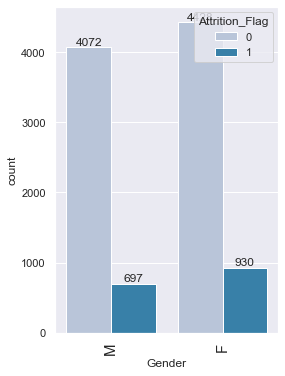

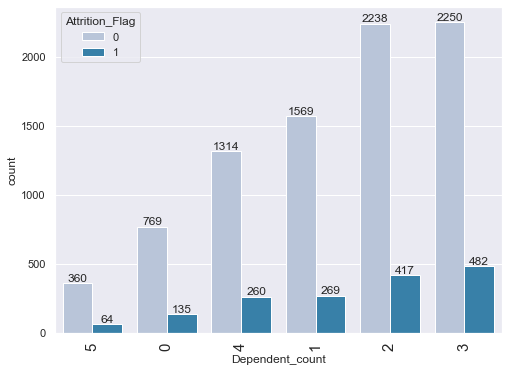

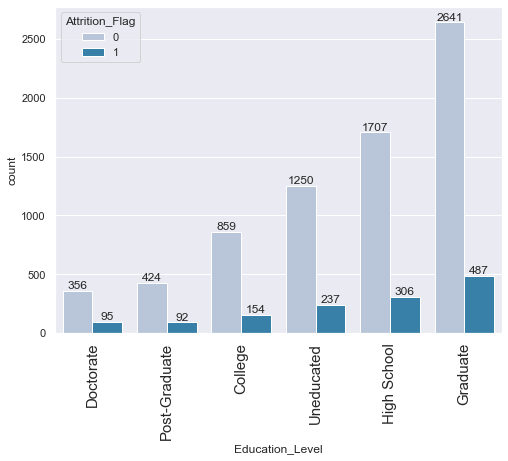

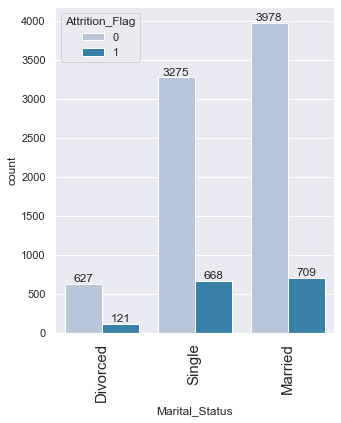

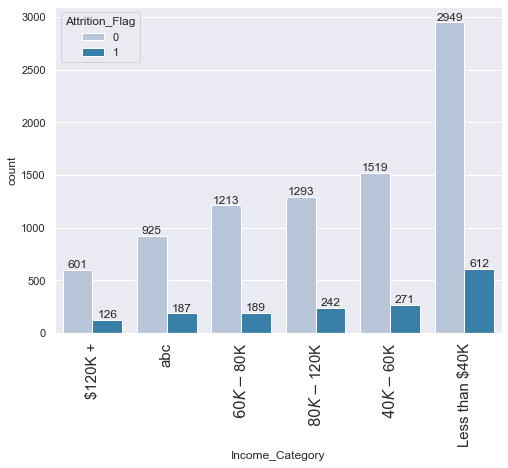

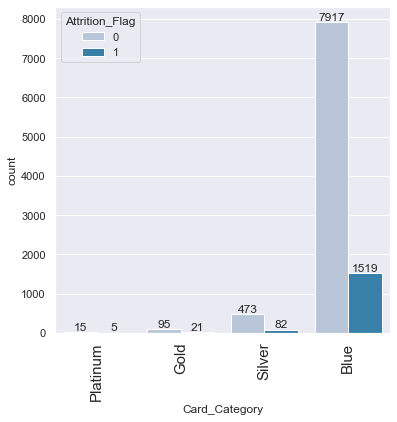

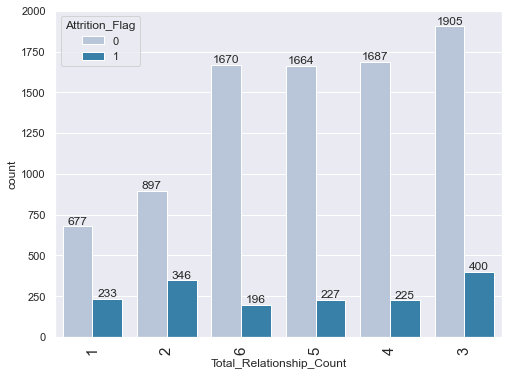

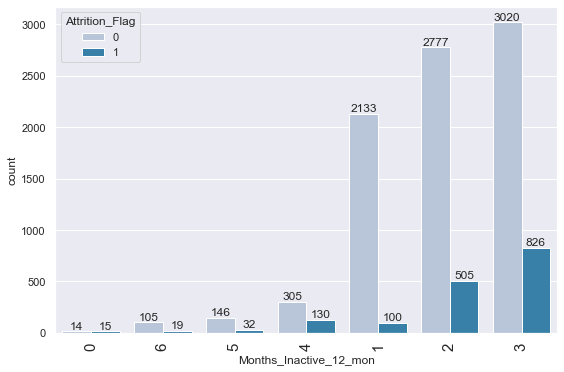

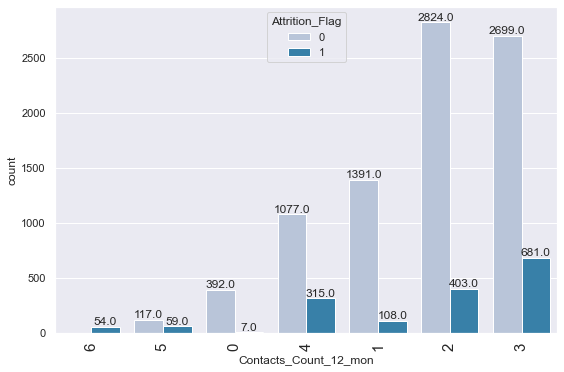

In [ ]:
for col in cat_col:
    labeled_barplot(tmp_data,col,"Attrition_Flag")

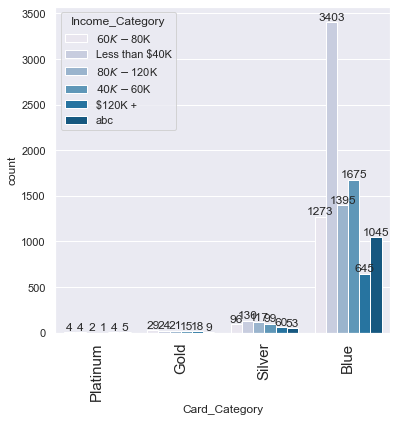

In [ ]:
labeled_barplot(tmp_data,"Card_Category","Income_Category")

### insights about Card_category vs Income Level

- Blue appears to be the entry level card, going to replace the unknown values with 60 - 80k income _level
as this is the most frequently occuring value. We'll use simpute imputer with "most frequent" as strategy

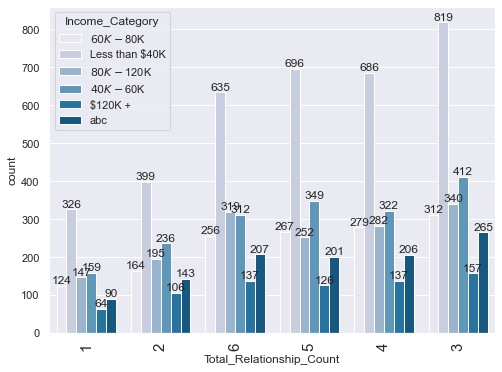

In [ ]:
labeled_barplot(tmp_data,"Total_Relationship_Count","Income_Category")

### Insights about Total_Relationship_Count
0
- Customers with 3 total card products have the highest occurence of income of <40k. Which this matches the current median income
level of americans households currently 

### Months_Inactive Insights


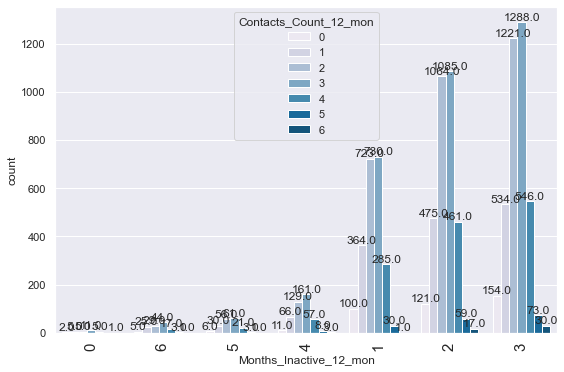

In [ ]:
labeled_barplot(tmp_data,"Months_Inactive_12_mon","Contacts_Count_12_mon") 

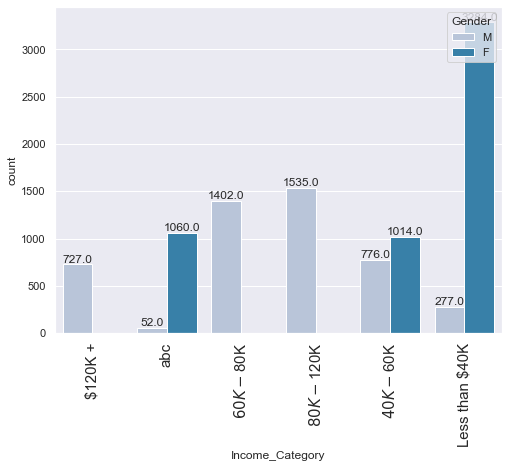

In [ ]:
labeled_barplot(tmp_data, "Income_Category", "Gender")

In [ ]:
# there is clearly a strong relationship between gender and income level
# we will use this relationship to impute values of income based upon gender 
# with preprocessing the data. 

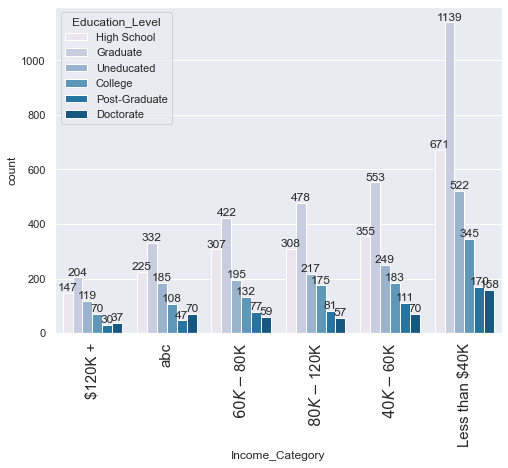

In [ ]:
labeled_barplot(tmp_data, "Income_Category", "Education_Level")

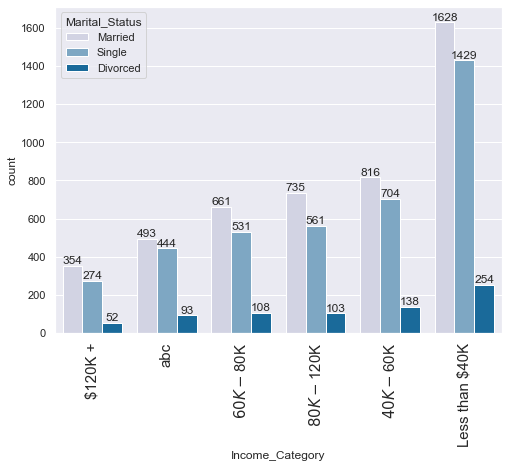

In [ ]:
labeled_barplot(tmp_data, "Income_Category", "Marital_Status")

In [ ]:
tmp_data.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [ ]:
#sns.regplot(data= tmp_data, y=tmp_data["Total_Revolving_Bal"], x=tmp_data.Months_Inactive_12_mon, hue = "Contacts_Count_12_mon");

In [ ]:
### Define function for stacked barplots

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    
    
    #predict_percentage = data[predictor]/(data[predictor]+data[target])
    #target_percentage = data[target]/(data[predictor]+data[target])
    
    #tab = pd.crosstab(predict_percentage, target_percentage, normalize="index").sort_values(
    #    by=sorter, ascending=False
    #)
    
    
    
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    
    )
    
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
cat_col

['Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon']

Attrition_Flag     0     1    All
Gender                           
All             8500  1627  10127
F               4428   930   5358
M               4072   697   4769
------------------------------------------------------------------------------------------------------------------------


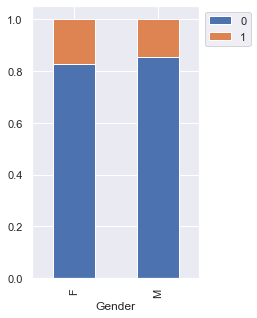

Attrition_Flag      0     1    All
Dependent_count                   
All              8500  1627  10127
3                2250   482   2732
2                2238   417   2655
1                1569   269   1838
4                1314   260   1574
0                 769   135    904
5                 360    64    424
------------------------------------------------------------------------------------------------------------------------


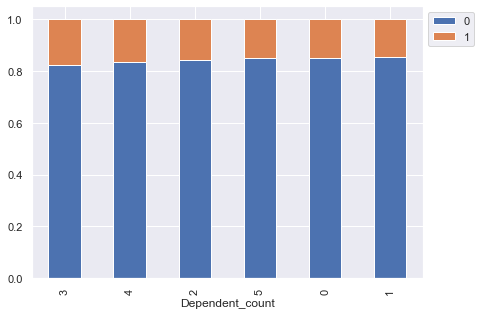

Attrition_Flag      0     1   All
Education_Level                  
All              7237  1371  8608
Graduate         2641   487  3128
High School      1707   306  2013
Uneducated       1250   237  1487
College           859   154  1013
Doctorate         356    95   451
Post-Graduate     424    92   516
------------------------------------------------------------------------------------------------------------------------


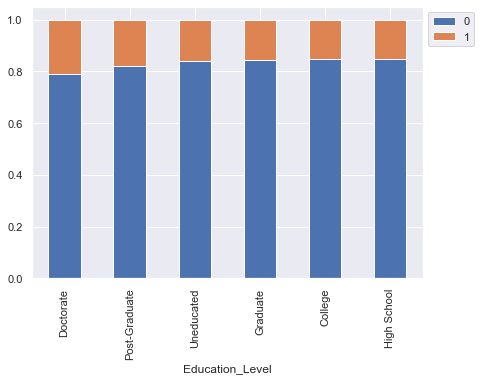

Attrition_Flag     0     1   All
Marital_Status                  
All             7880  1498  9378
Married         3978   709  4687
Single          3275   668  3943
Divorced         627   121   748
------------------------------------------------------------------------------------------------------------------------


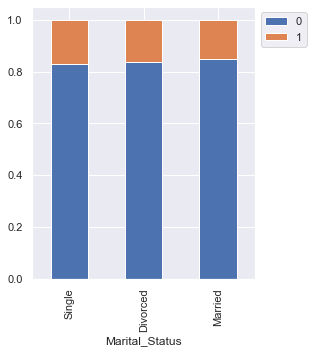

Attrition_Flag      0     1    All
Income_Category                   
All              8500  1627  10127
Less than $40K   2949   612   3561
$40K - $60K      1519   271   1790
$80K - $120K     1293   242   1535
$60K - $80K      1213   189   1402
abc               925   187   1112
$120K +           601   126    727
------------------------------------------------------------------------------------------------------------------------


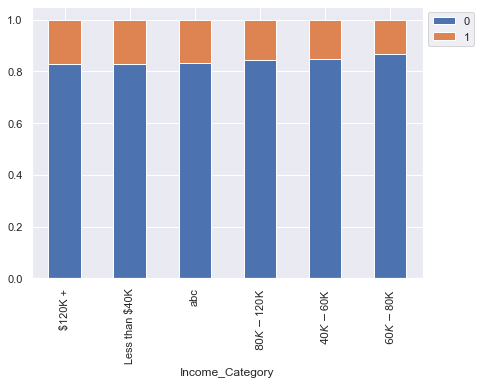

Attrition_Flag     0     1    All
Card_Category                    
All             8500  1627  10127
Blue            7917  1519   9436
Silver           473    82    555
Gold              95    21    116
Platinum          15     5     20
------------------------------------------------------------------------------------------------------------------------


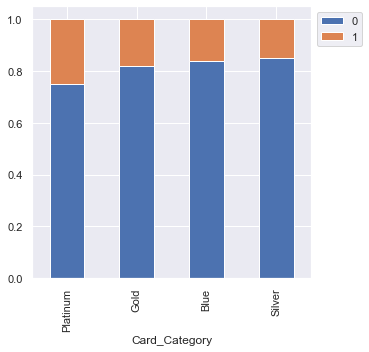

Attrition_Flag               0     1    All
Total_Relationship_Count                   
All                       8500  1627  10127
3                         1905   400   2305
2                          897   346   1243
1                          677   233    910
5                         1664   227   1891
4                         1687   225   1912
6                         1670   196   1866
------------------------------------------------------------------------------------------------------------------------


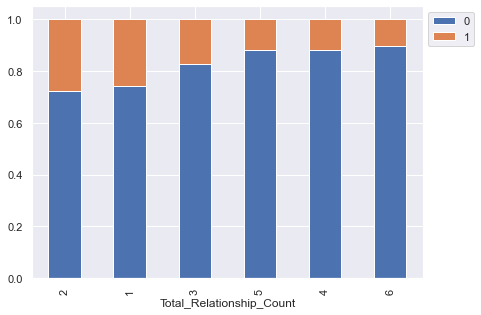

Attrition_Flag             0     1    All
Months_Inactive_12_mon                   
All                     8500  1627  10127
3                       3020   826   3846
2                       2777   505   3282
4                        305   130    435
1                       2133   100   2233
5                        146    32    178
6                        105    19    124
0                         14    15     29
------------------------------------------------------------------------------------------------------------------------


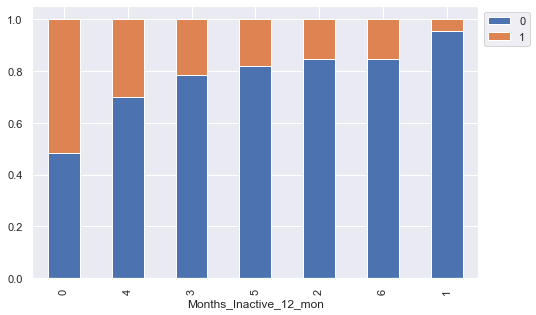

Attrition_Flag            0     1    All
Contacts_Count_12_mon                   
All                    8500  1627  10127
3                      2699   681   3380
2                      2824   403   3227
4                      1077   315   1392
1                      1391   108   1499
5                       117    59    176
6                         0    54     54
0                       392     7    399
------------------------------------------------------------------------------------------------------------------------


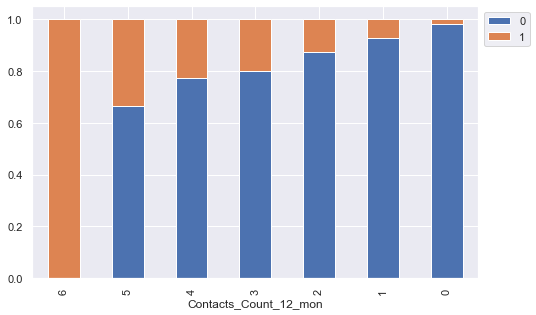

In [ ]:
for col in cat_col:
    stacked_barplot(tmp_data,col,"Attrition_Flag")

In [ ]:

def histogram_boxplot(data, feature,hue, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: show kernel density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2,hue=hue, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
def distribution_plot_wrt_target(data, predictor, target):
    
    """
    box plot and histogram combined

    data: dataframe
    feature: dataframe column
    target: target classification colummn
  
    """
    
    
    import warnings
    warnings.filterwarnings("ignore")
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set(color_codes=True)  


    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="Blues")

    axs[1, 1].set_title("Boxplot (with flier removed) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="Blues",
    )

    plt.tight_layout()
    plt.show()


In [ ]:
# define column list of tmp_data 
col_list =list(tmp_data.columns)

In [ ]:
col_list

['Attrition_Flag',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [ ]:
#col_list.remove("CLIENTNUM")
col_list.remove("Attrition_Flag")

In [ ]:
print(col_list)

['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


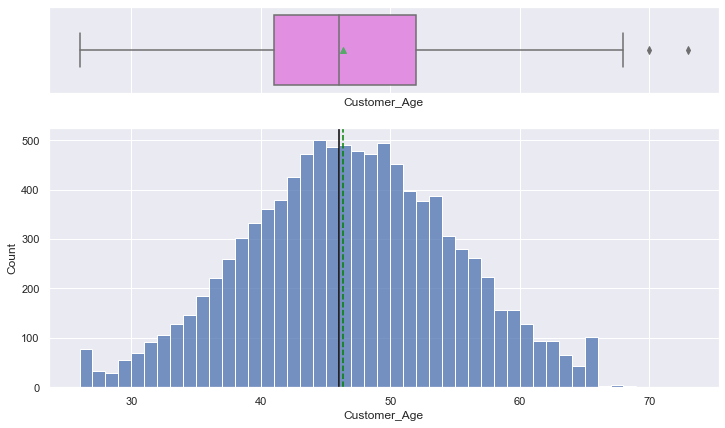

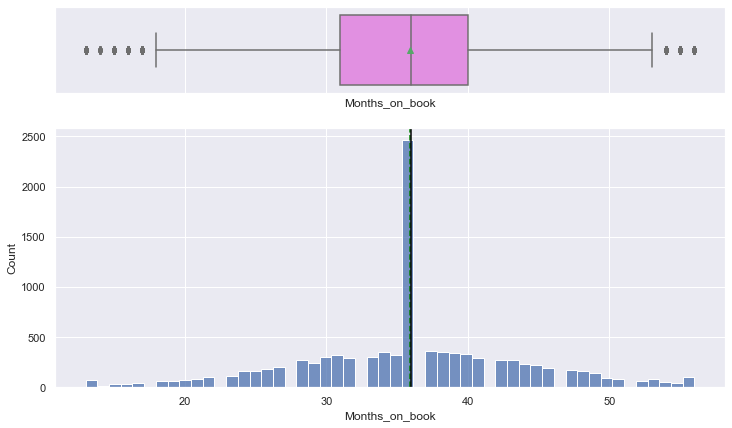

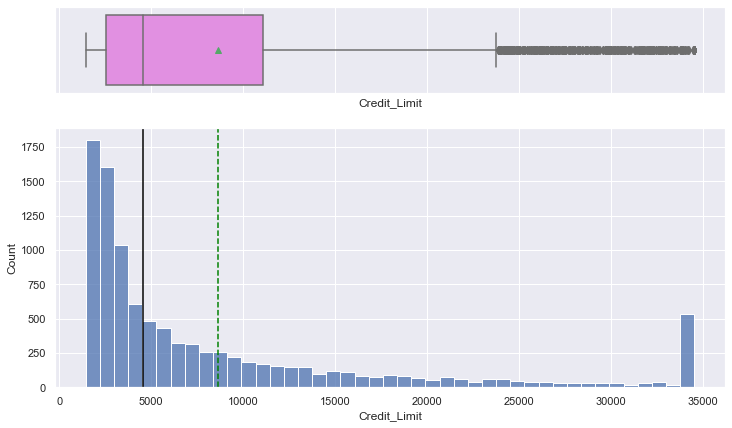

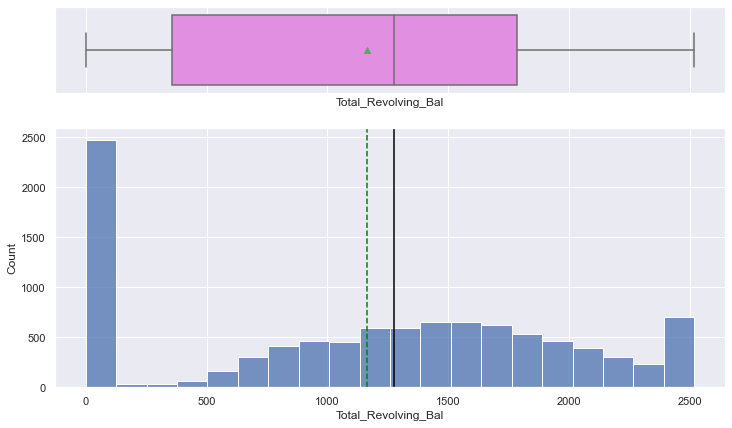

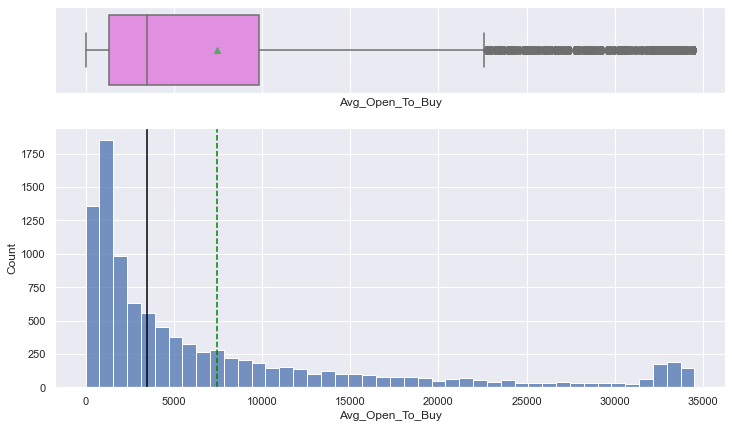

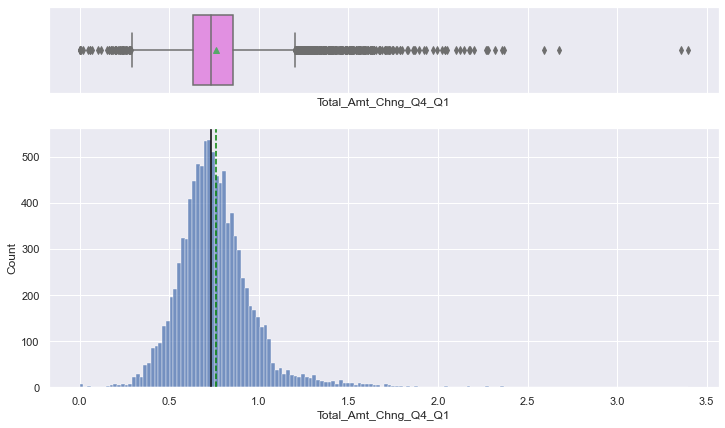

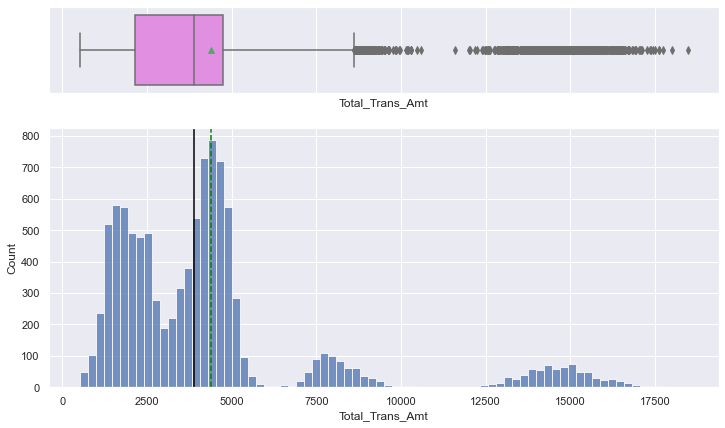

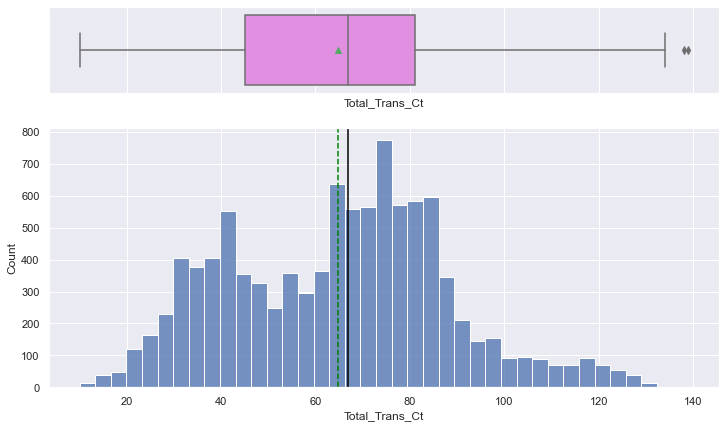

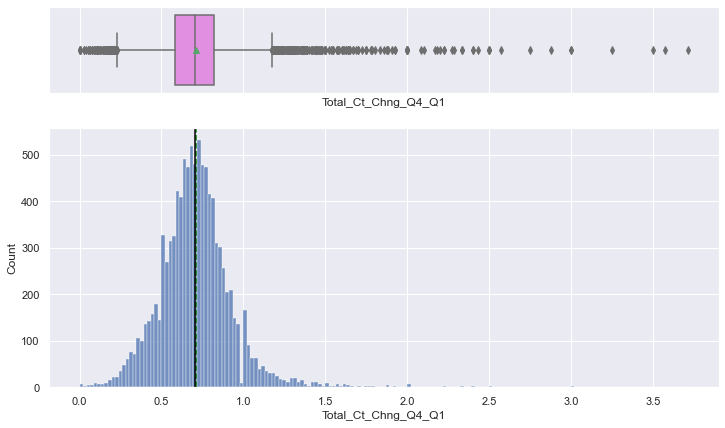

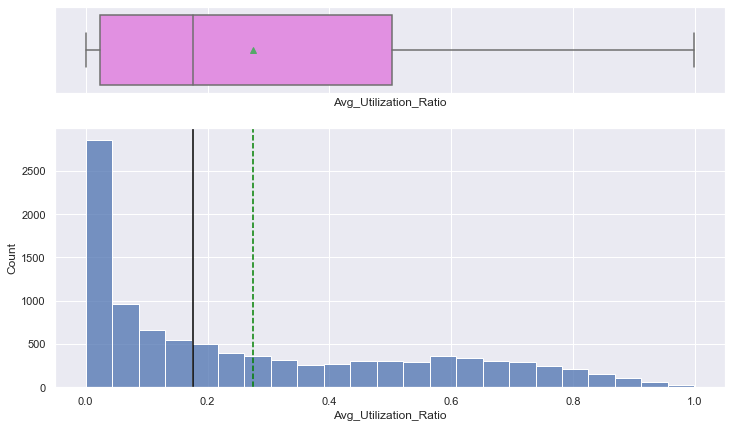

In [ ]:
for col in col_list:
    if not col in cat_col:    
        histogram_boxplot(tmp_data,col, hue= None)

<AxesSubplot:xlabel='Total_Relationship_Count', ylabel='Avg_Utilization_Ratio'>

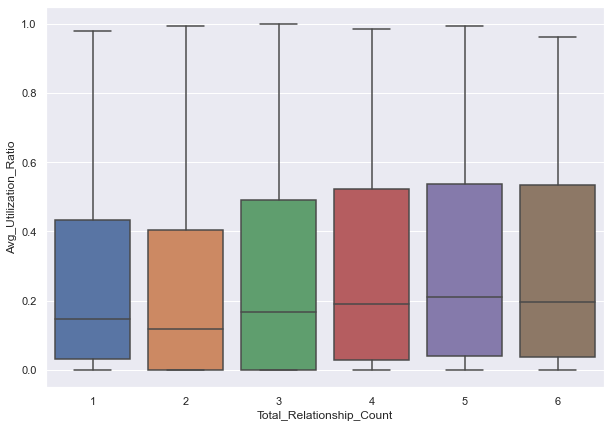

In [ ]:
###  deeper dive into Avg_utilization ratio 


sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(y="Avg_Utilization_Ratio", x="Total_Relationship_Count", data=data, orient="vertical")

<AxesSubplot:xlabel='Card_Category', ylabel='Avg_Utilization_Ratio'>

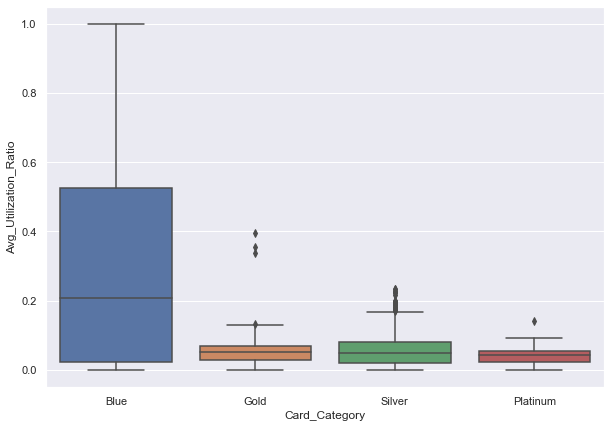

In [ ]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(y="Avg_Utilization_Ratio", x="Card_Category", data=data, orient="vertical")

In [ ]:
# high utilization ratio is related to the card category that is carried by the customers, and
# this is related to the income cateogry as well. 

<AxesSubplot:xlabel='Total_Trans_Amt', ylabel='Count'>

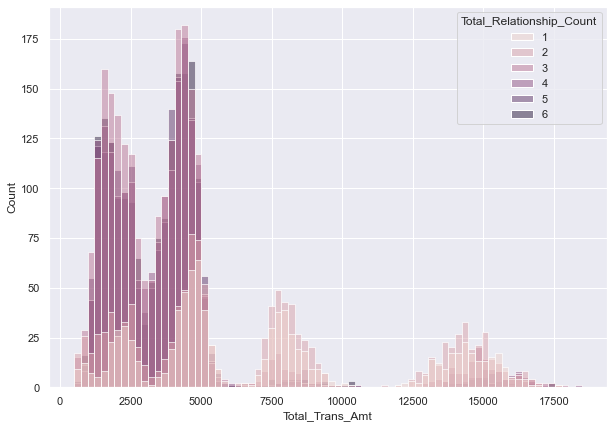

In [ ]:
sns.histplot(tmp_data,x= "Total_Trans_Amt", hue= "Total_Relationship_Count")

In [ ]:
# total _trans amt and total relationship cont appear to have multiple distributions broken based 
# on the amount cards they carry and the trans amt. the ones with only 1 card appear to have 
# the max trans amounts. While the majority of the customers by # of cards only spend 0 - 5000$ on total transaction
# in the 12 month period.

<AxesSubplot:xlabel='Total_Trans_Amt', ylabel='Count'>

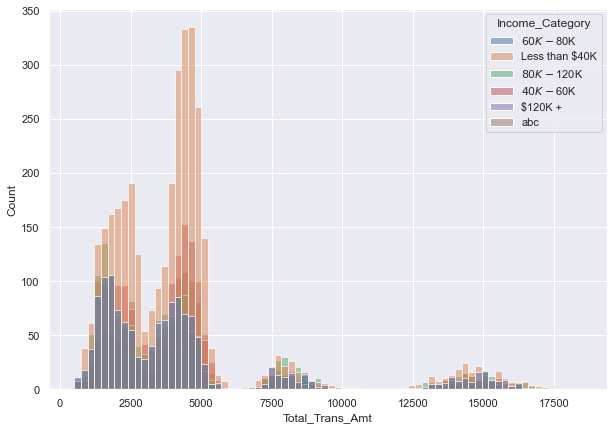

In [ ]:
sns.histplot(tmp_data,x= "Total_Trans_Amt", hue= "Income_Category")

In [ ]:
# it appears that total amt and income _cateogry have a relationship the most amount of customers are the ones with 40k
# and less income

<Figure size 1800x720 with 0 Axes>

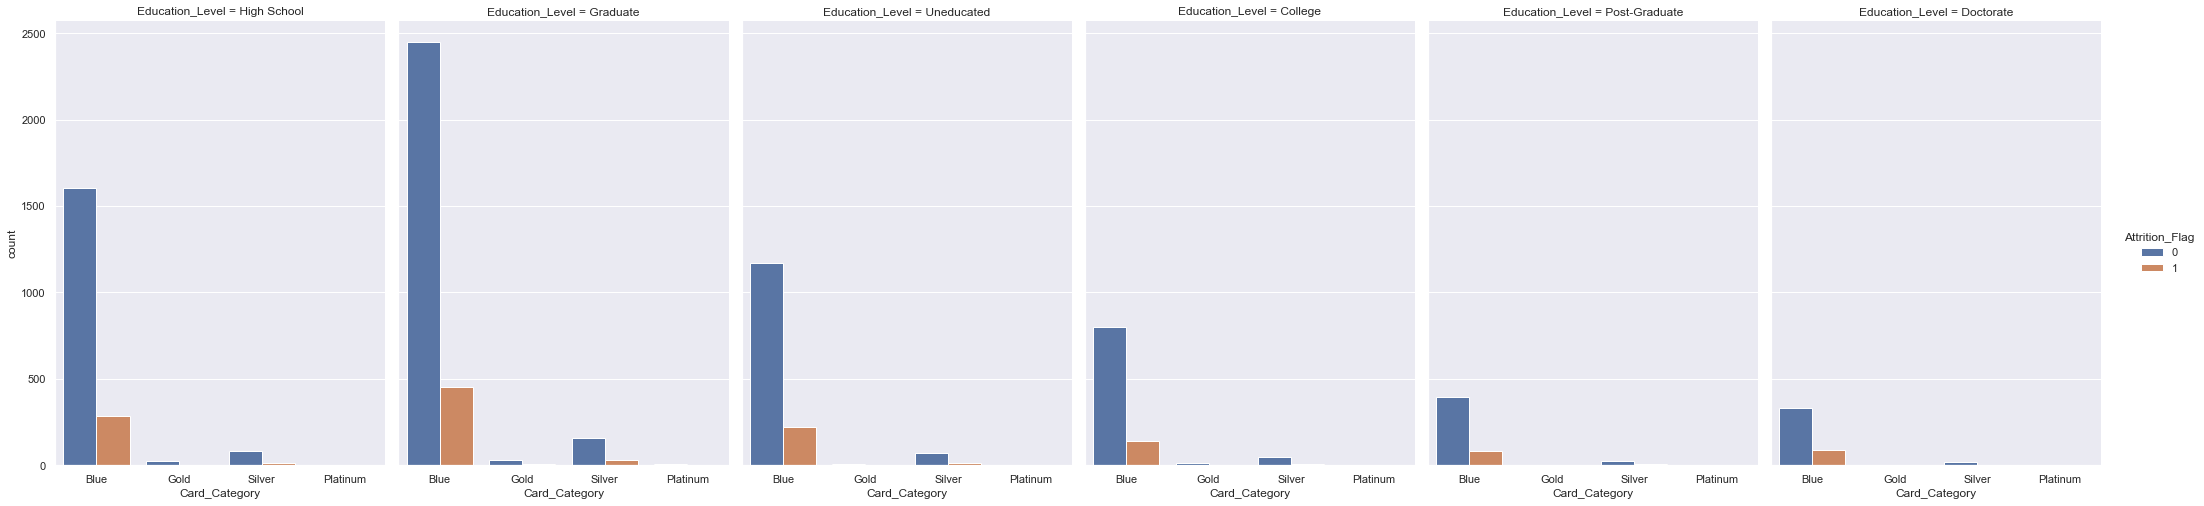

In [ ]:
plt.figure(figsize=(25, 10))
sns.catplot(data= tmp_data,x= "Card_Category", col = "Education_Level", kind = "count", hue = "Attrition_Flag",height=7,aspect =.7)

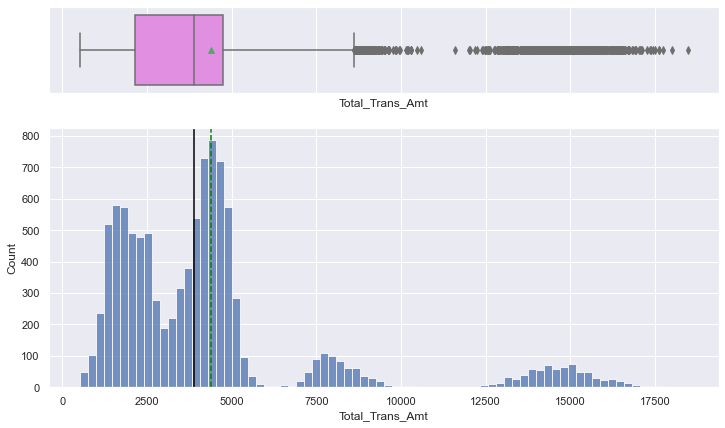

In [ ]:
histogram_boxplot(tmp_data,"Total_Trans_Amt",hue="Card_Category")

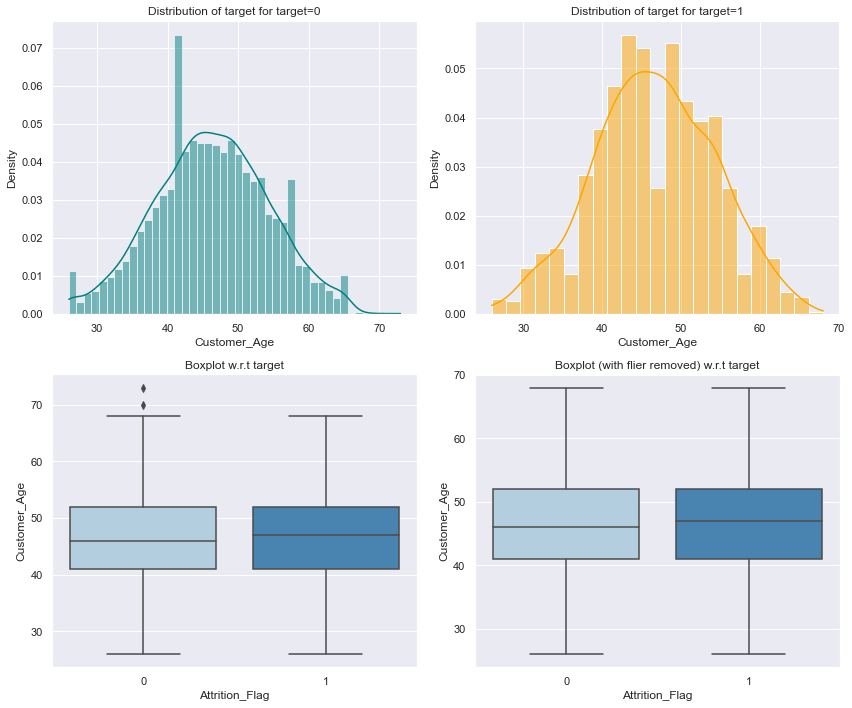

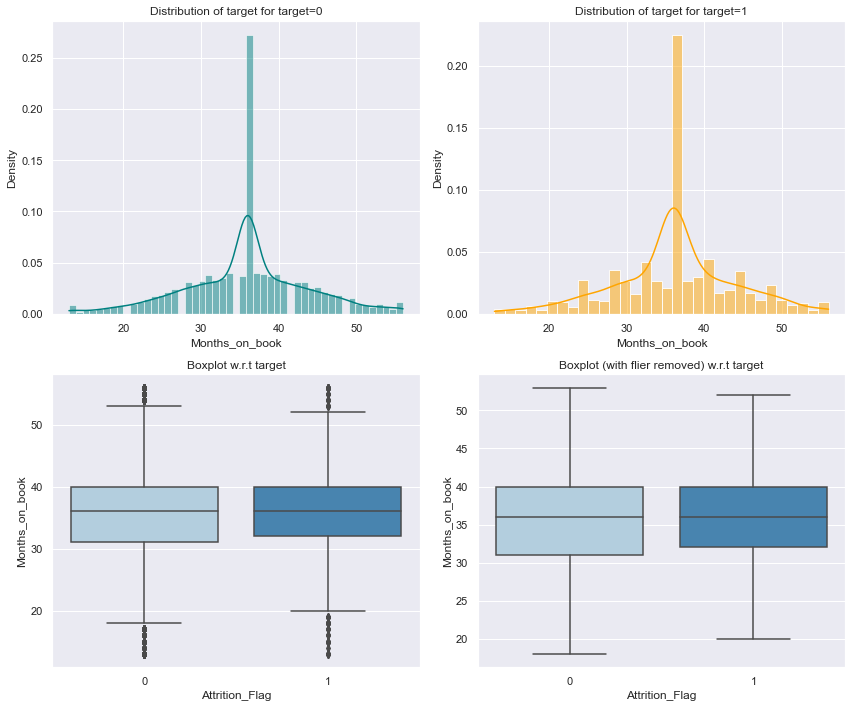

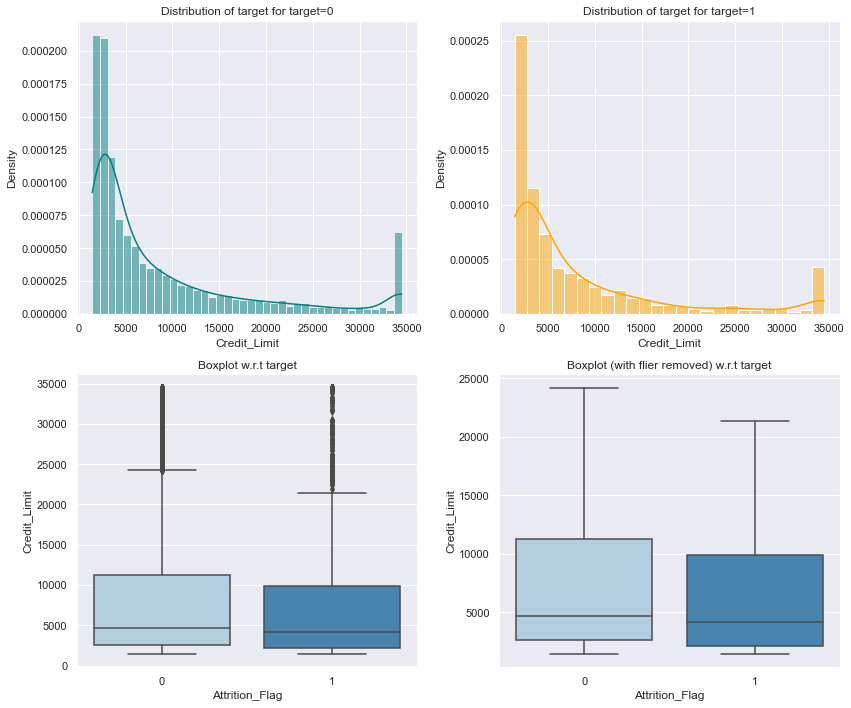

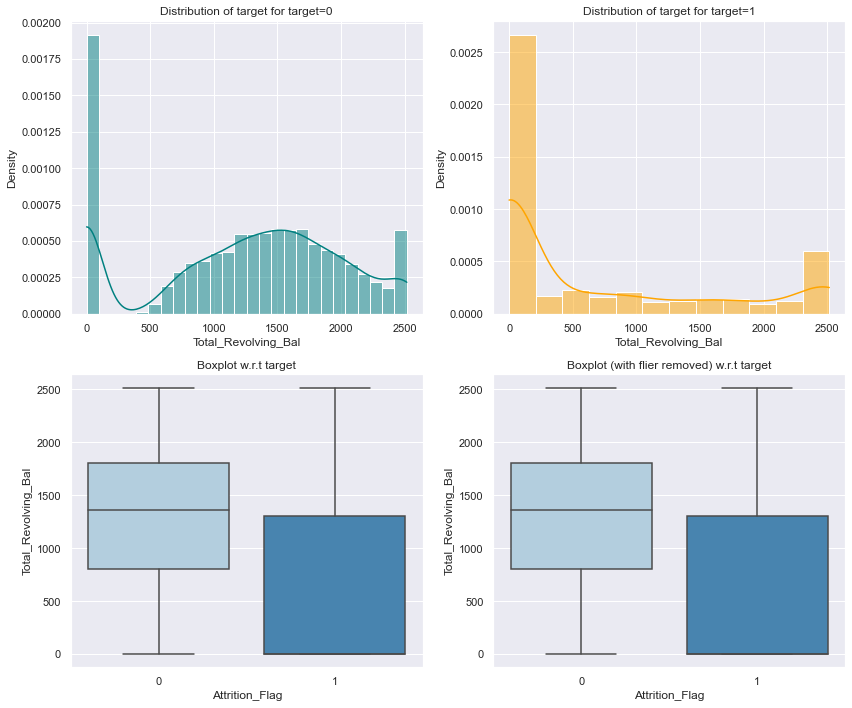

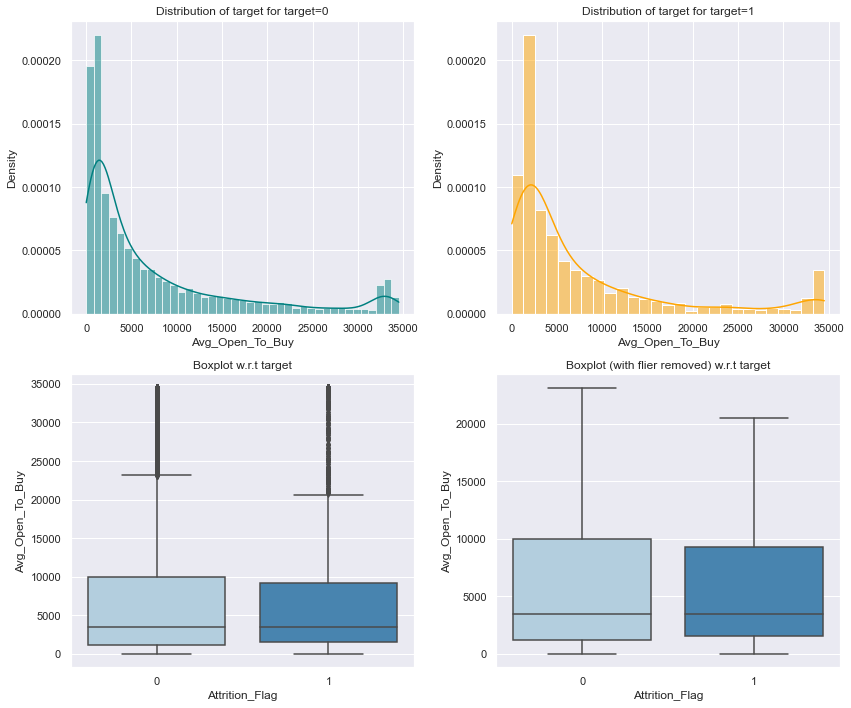

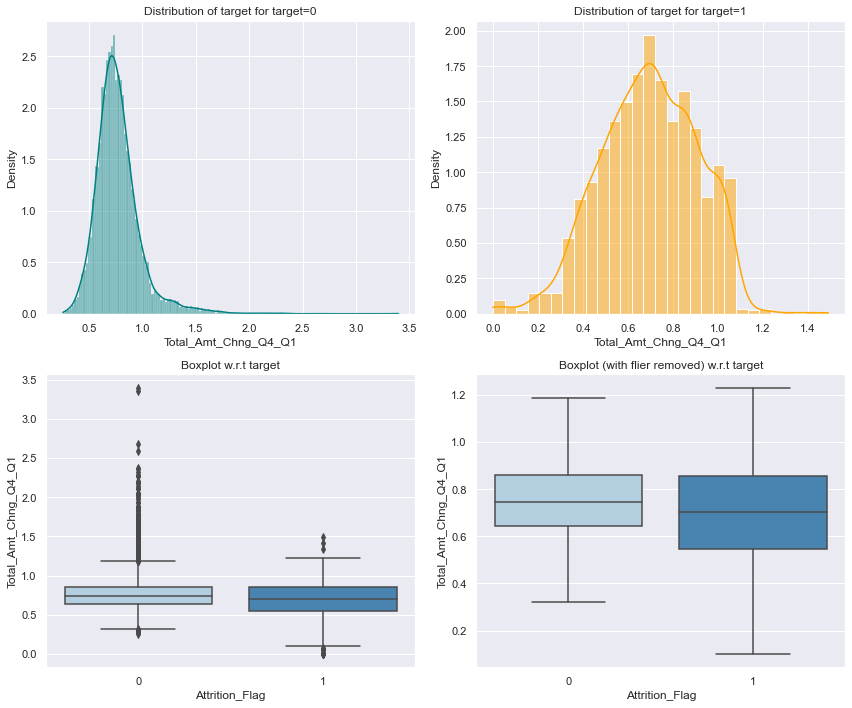

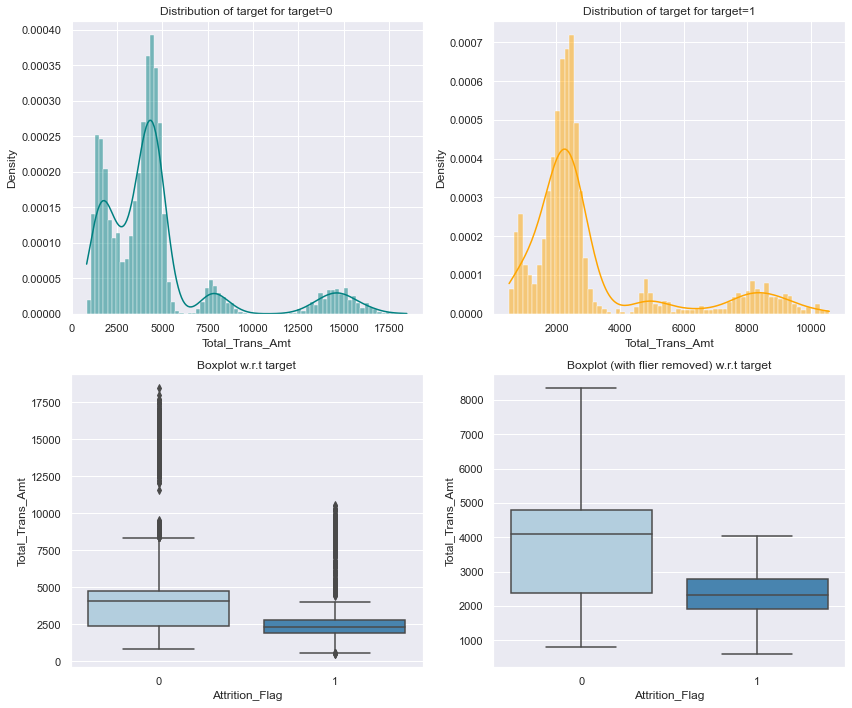

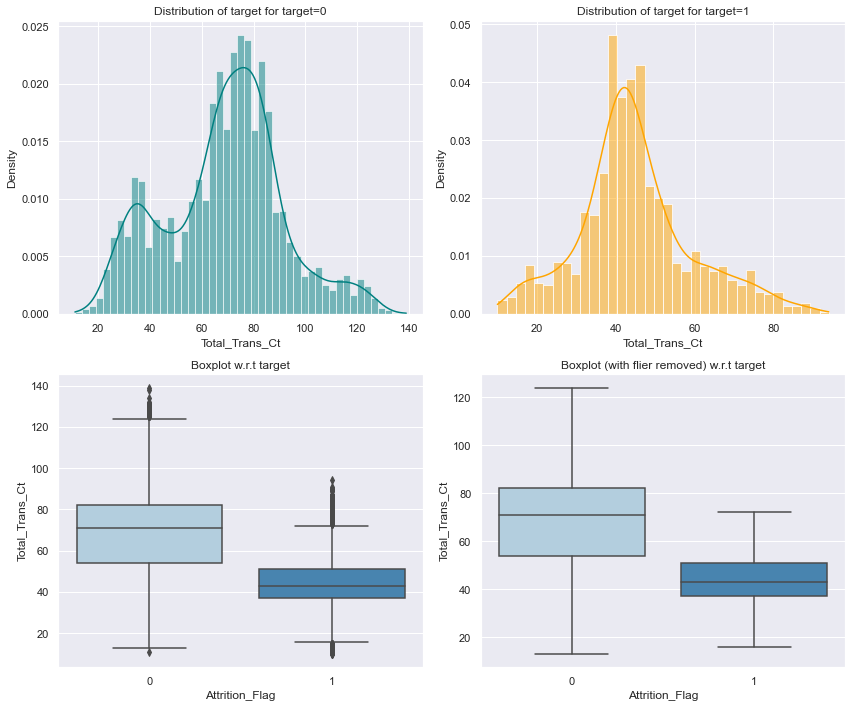

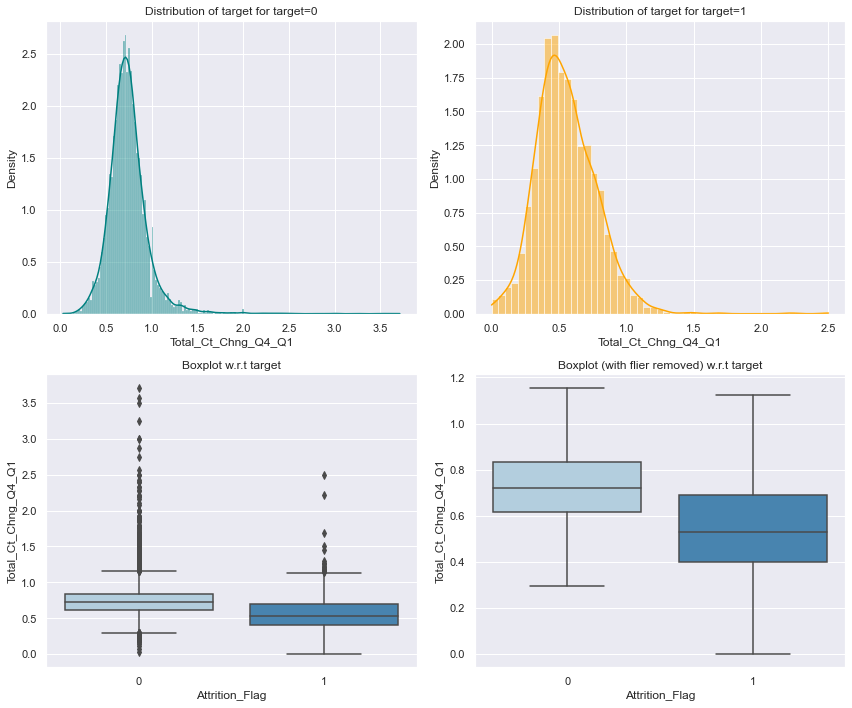

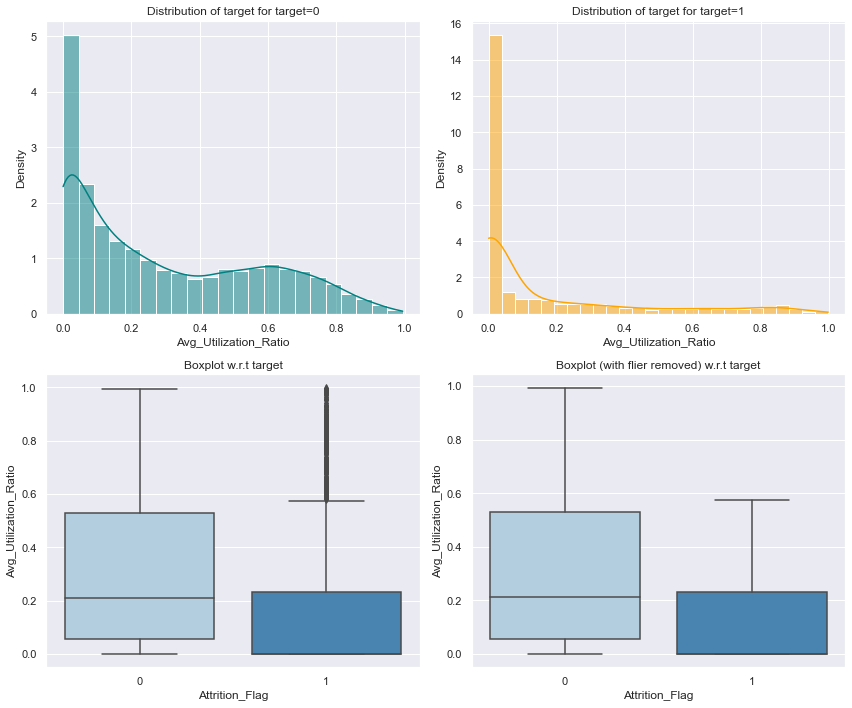

In [ ]:
for col in col_list:
    if not col in cat_col:    
      distribution_plot_wrt_target(tmp_data,col,"Attrition_Flag")

<AxesSubplot:xlabel='Education_Level', ylabel='Total_Trans_Amt'>

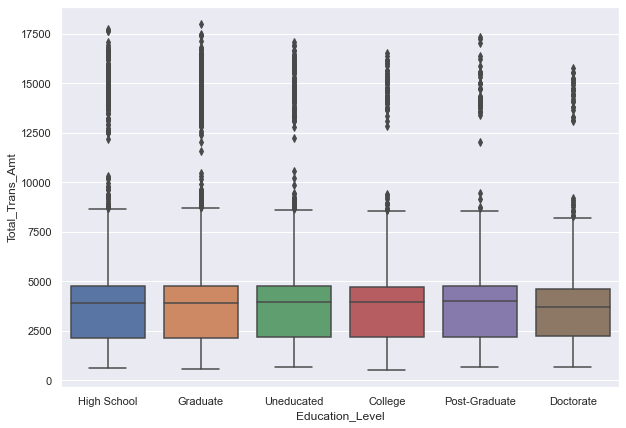

In [ ]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(y="Total_Trans_Amt", x="Education_Level", data=data, orient="vertical")

In [ ]:
# there are outliers between each group of education level the medians are quite identical
# the Doctorate has a slightly lower 12 month trans amt


<AxesSubplot:xlabel='Marital_Status', ylabel='Total_Trans_Amt'>

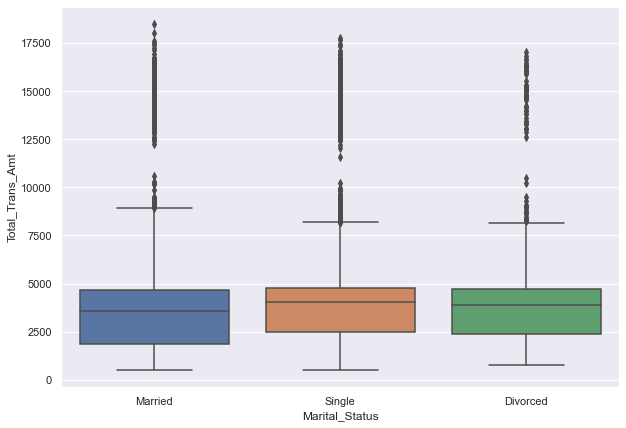

In [ ]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(y="Total_Trans_Amt", x="Marital_Status", data=data, orient="vertical")

<AxesSubplot:xlabel='Gender', ylabel='Total_Trans_Amt'>

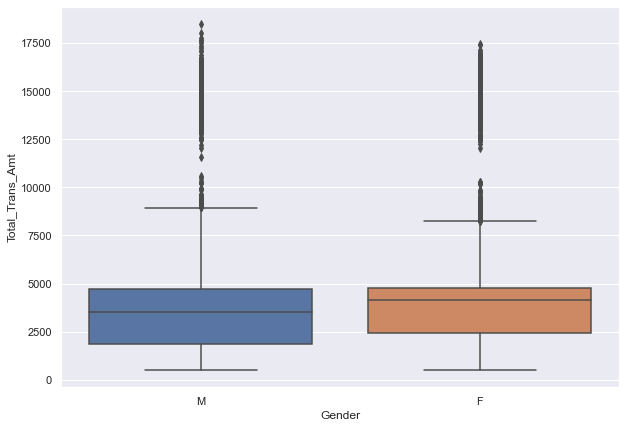

In [ ]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(y="Total_Trans_Amt", x="Gender", data=data, orient="vertical")

In [ ]:
# look at the correlation between each variable
def make_corr_matrix(corr_matrix):

    fig, ax = plt.subplots(figsize= (15,10))
    ax = sns.heatmap(corr_matrix, 
                    annot = True,
                    linewidths=0.5,
                    fmt= ".2f",
                    cmap= "YlGnBu");
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + .5, top - 0.5)
    plt.show()

In [ ]:
# use empty list to define the column names that are not in cat_cols and are continous variables
corr_columns = []
 
for col in col_list:
    if not col in cat_col:    
        corr_columns.append(col)

In [ ]:
corr_columns

['Customer_Age',
 'Months_on_book',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [ ]:
# define index of columns for correlation matrix
# use for loop to loop over each column that is not a categorical column
# only use columns that are continous and not discrete/
corr_index = tmp_data.index 
for col in col_list:
    
    if not col in cat_col:
                tmp_data.index

In [ ]:
corr_df = pd.DataFrame(data= tmp_data,index= corr_index, columns =corr_columns)
corr_df = corr_df.corr()

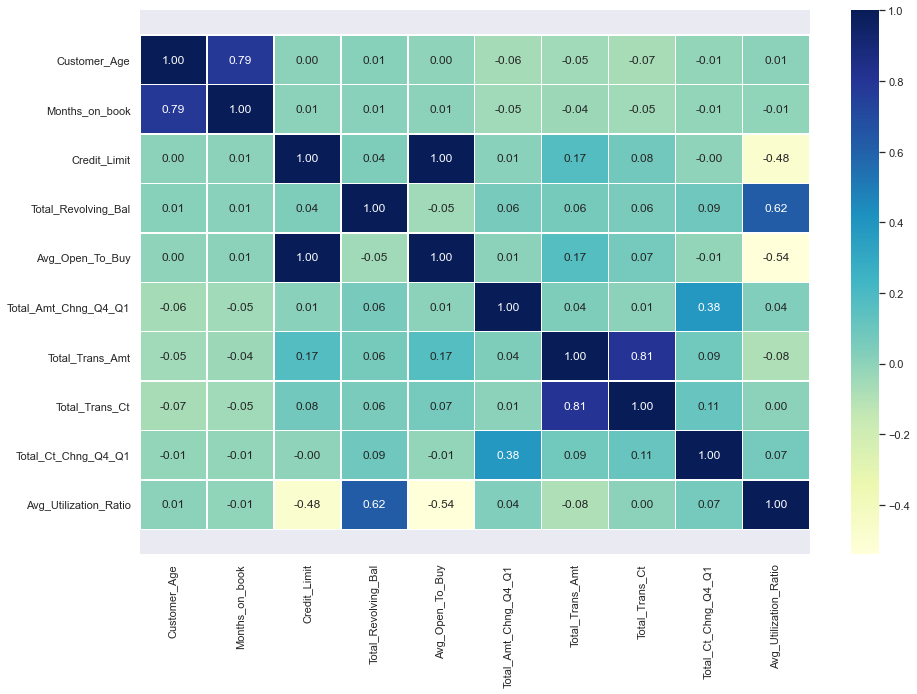

In [ ]:
make_corr_matrix(corr_df)

In [ ]:
# categorical corr _df 

cat_corr_df = pd.DataFrame(data= tmp_data,index= tmp_data.index, columns =cat_col)
cat_corr_df = cat_corr_df.corr()

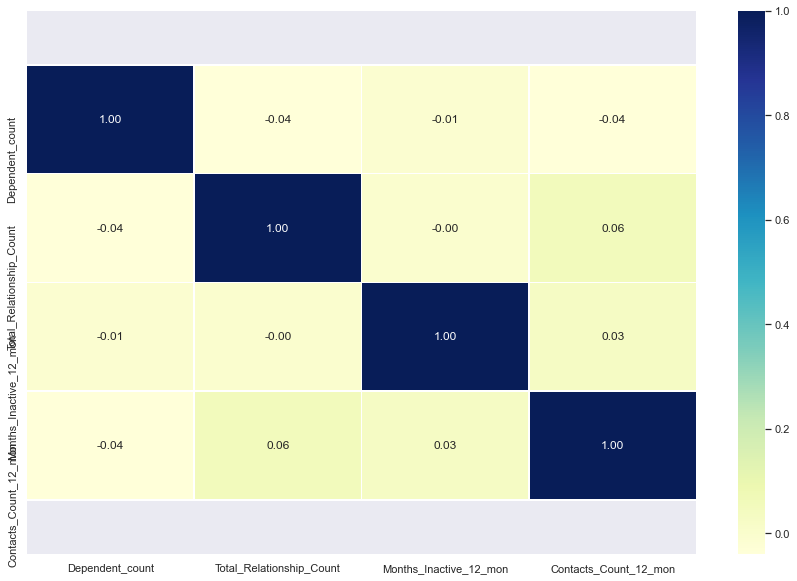

In [ ]:
make_corr_matrix(cat_corr_df)

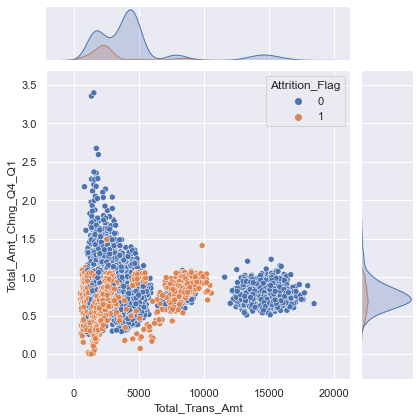

In [ ]:
# EDA on continous Variables with high correlation in the correlation matrix.


# use joint plot
# see both distributions to find patterns within the data
sns.jointplot(data = tmp_data, x = 'Total_Trans_Amt', y = 'Total_Amt_Chng_Q4_Q1', hue = 'Attrition_Flag')
plt.show()

### insights
- from 0 amt both variables are postively related wrt to attrition and existing cutomer, but as they increase
the relationship between the attrition flag breaks. There is a threshhold to when a customer begins to not churn 
any more, it appears after 12,500 and wee see that in the data

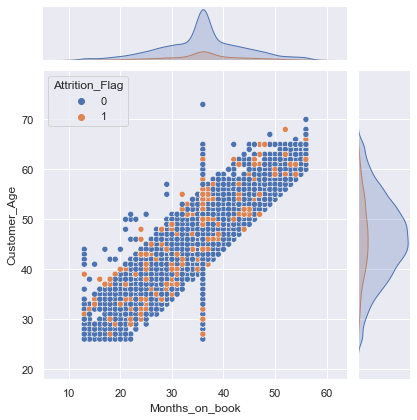

In [ ]:
# example of scatter plot - we pick pair having highest (Pearson) correlation
sns.jointplot(data = tmp_data, x = 'Months_on_book', y = 'Customer_Age', hue = 'Attrition_Flag')
plt.show()

###  insights
- This shows the highest amounr of existing customers at the 36 month mark. 
- AS customers age increases, so does the time they are on the books.

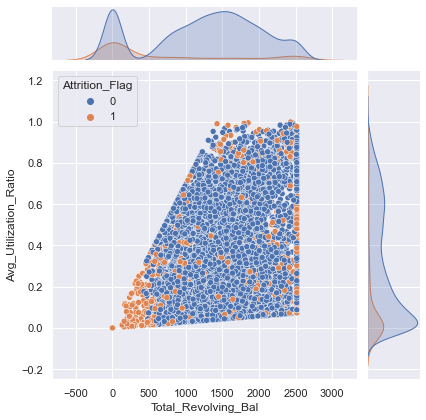

In [ ]:
sns.jointplot(data = tmp_data, x = 'Total_Revolving_Bal', y = 'Avg_Utilization_Ratio', hue = 'Attrition_Flag')
plt.show()

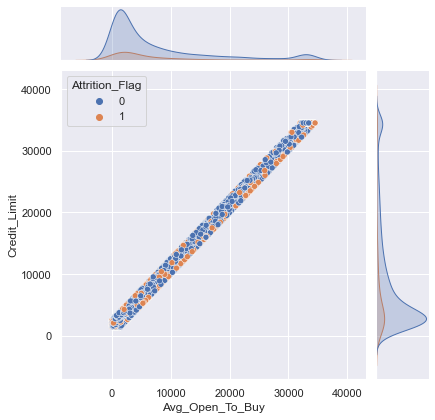

In [ ]:
sns.jointplot(data = tmp_data, x = 'Avg_Open_To_Buy', y = 'Credit_Limit', hue = 'Attrition_Flag')
plt.show()

In [ ]:
### the average open to buy and credit_limit is directly correlated, 

In [ ]:
# pairplot 
# define pairplot data frame

pair_df = pd.DataFrame(data=data,index= corr_index, columns =corr_columns)

<Figure size 1080x1080 with 0 Axes>

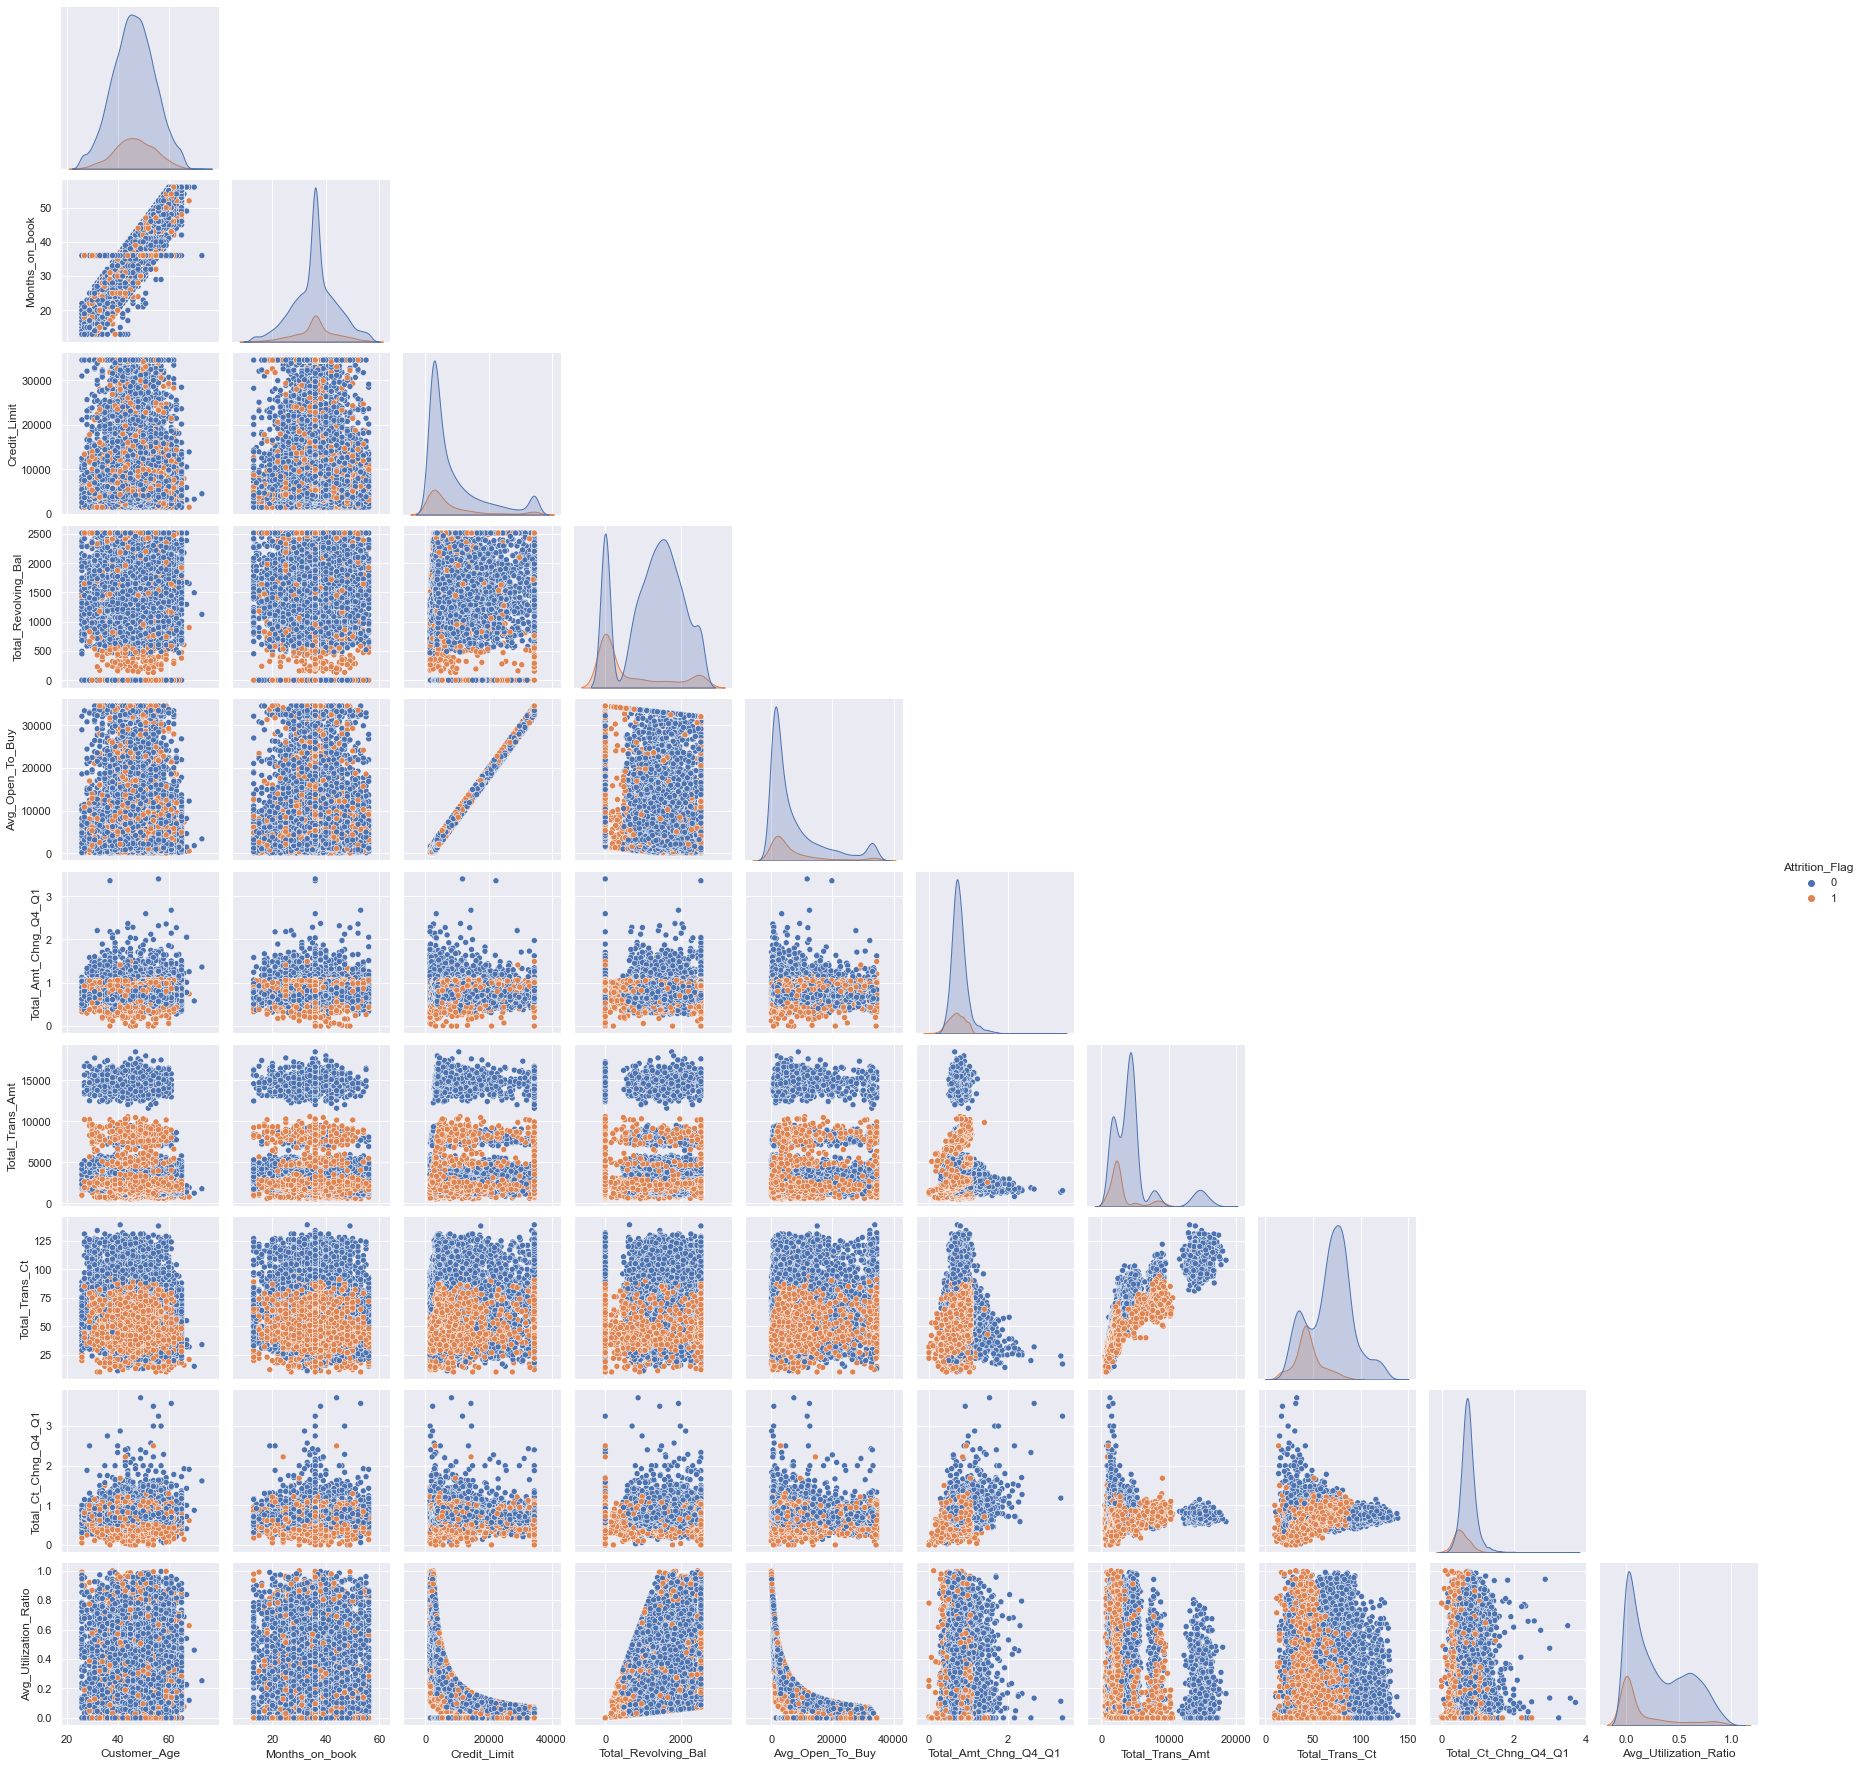

In [ ]:
# make a numerical column list quickly for pipeline numerical transformer 
num_col = []
for col in col_list:
    if not col in cat_col:
        num_col.append(col)
plt.figure(figsize=(15, 15))
sns.pairplot(tmp_data,x_vars = num_col, y_vars = num_col, hue="Attrition_Flag", corner=True)
plt.show()


Insights EDA 

- Categorical Non Cont Features: 

- Attrition Flag: Indicating whether a customer attrites or is existing
A vast majority of the customers are existing and non attriting. The class of attrition will have to upsampled using an upsampling technique or existing customers will have to be downsampled. The attrited customers existed between 16% of the customer base.
Gender: Male and Female and between attrited and no attrited doesn’t differ to greatly from comparing to the distribution of attrited vs existing. 

- Dependent Count : 
The highest attrited customers are the ones with 3 dependents. The least amount of customers that attrite are from the group that have 5 dependents. This makes sense as more dependents could lead to more extending themselves on credit. 

- Education_Level :  the highest amount of attrition occur between the customers with graduate degrees. The least amount of attrition occur within the post – graduate  group

- Marital Status: 
There is really no significant difference within single, married or divorced customers with respect to customer attrition or existing customer. 

- Income: 
The top 2 two attrited customers are from the 120k and less than 40k income levels. Then followed by the unknown income as “abc”.  The percentage across all of the income levels with respect to attrited vs existing customers are nearly equal. There isn’t anything that seriously stands out between these income levels. The “abc” income will be turned into np.nan. Looking at the Income vs card_cateogry disparity, the unknown value will be imputed to map the low income level as this was the lowest occuring within the barplot.  



- Card_Category: The “Blue category” appears to be the base level income card. As it has the highest amount of users within this customer base.  The highest amount of attrition comes from the platinum level card members. 
- Relationship_Count: 
The customers with 2 total products with the credit_card count have the highest amount of attrition. This is followed by customers with just 1 product. 
Months_Inactive_12_Mon: 
The highest amount of customer attrition occurs with the customers having 3 months of account activity.


In [ ]:
# encode missing data columns 

replace_dict = {
    "Gender" : {"M" : 0, "F" : 1 },
    "Education_Level" : {"Uneducated": 0, "High School": 1, "College": 2, "Graduate": 3, "Post-Graduate": 4, "Doctorate": 5},
    "Marital_Status" : {"Single": 0, "Married": 1, "Divorced": 2},
    "Income_Category" : {"Less than $40K": 0, "$40K - $60K": 1, "$60K - $80K": 2, "$80K - $120K": 3, "$120K +": 4},
    "Card_Category" : {"Blue": 0, "Silver": 1, "Gold": 2, "Platinum": 3},
    
}



In [ ]:
replace_dict.items()

dict_items([('Gender', {'M': 0, 'F': 1}), ('Education_Level', {'Uneducated': 0, 'High School': 1, 'College': 2, 'Graduate': 3, 'Post-Graduate': 4, 'Doctorate': 5}), ('Marital_Status', {'Single': 0, 'Married': 1, 'Divorced': 2}), ('Income_Category', {'Less than $40K': 0, '$40K - $60K': 1, '$60K - $80K': 2, '$80K - $120K': 3, '$120K +': 4}), ('Card_Category', {'Blue': 0, 'Silver': 1, 'Gold': 2, 'Platinum': 3})])

In [ ]:
# make copy of the original data frame
data_copy = data.copy()
data_copy["Attrition_Flag"]= data_copy["Attrition_Flag"].map({"Attrited Customer":1, "Existing Customer":0})

In [ ]:
data_copy["Education_Level"].isnull() == "N/A"

0        False
1        False
2        False
3        False
4        False
         ...  
10122    False
10123    False
10124    False
10125    False
10126    False
Name: Education_Level, Length: 10127, dtype: bool

In [ ]:
# replace values with income level = "abc" with "NaN"
data_copy["Income_Category"] = data_copy["Income_Category"].replace("abc", "NaN")


In [ ]:
data_copy =  data_copy.replace(replace_dict)

In [ ]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  int64  
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  int64  
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   float64
 6   Marital_Status            9378 non-null   float64
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  int64  
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
# drop CLient Num 
data_copy = data_copy.drop(columns = "CLIENTNUM", axis =1)

In [ ]:
X_scaled

Customer_Age  Gender  Dependent_count  Education_Level  Marital_Status  \
0            -0.165  -1.060            0.503           -0.751           0.550   
1             0.334   0.943            2.043            0.665          -1.064   
2             0.583  -1.060            0.503            0.665           0.550   
3            -0.789   0.943            1.273           -0.751             NaN   
4            -0.789  -1.060            0.503           -1.459           0.550   
...             ...     ...              ...              ...             ...   
10122         0.458  -1.060           -0.267            0.665          -1.064   
10123        -0.664  -1.060           -0.267              NaN           2.163   
10124        -0.290   0.943           -1.036           -0.751           0.550   
10125        -2.037  -1.060           -0.267            0.665             NaN   
10126        -0.415   0.943           -0.267            0.665           0.550   

       Income_Category  Card_Category  Months_on_book  \
0                0.484         -0.251           0.385   
1               -0.990         -0.251           1.011   
2                1.222         -0.251           0.009   
3               -0.990         -0.251          -0.241   
4                0.484         -0.251          -1.869   
...                ...            ...             ...   
10122           -0.253         -0.251           0.510   
10123           -0.253         -0.251          -1.368   
10124           -0.990         -0.251           0.009   
10125           -0.253         -0.251           0.009   
10126           -0.990          2.746          -1.368   

       Total_Relationship_Count  Months_Inactive_12_mon  \
0                         0.764                  -1.327   
1                         1.407                  -1.327   
2                         0.121                  -1.327   
3                        -0.523                   1.641   
4                         0.764                  -1.327   
...                         ...                     ...   
10122                    -0.523                  -0.338   
10123                     0.121                  -0.338   
10124                     0.764                   0.652   
10125                     0.121                   0.652   
10126                     1.407                  -0.338   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                      0.492         0.447               -0.473   
1                     -0.412        -0.041               -0.367   
2                     -2.220        -0.574               -1.427   
3                     -1.316        -0.585                1.662   
4                     -2.220        -0.431               -1.427   
...                      ...           ...                  ...   
10122                  0.492        -0.509                0.844   
10123                  0.492        -0.479                1.256   
10124                  1.396        -0.355               -1.427   
10125                  0.492        -0.369               -1.427   
10126                  1.396         0.193                0.979   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0                0.489                 2.623           -0.960          -0.974   
1               -0.008                 3.563           -0.916          -1.357   
2               -0.446                 8.367           -0.741          -1.911   
3               -0.734                 2.943           -0.952          -1.911   
4               -0.303                 6.456           -1.056          -1.570   
...                ...                   ...              ...             ...   
10122           -0.585                -0.260            3.259           2.221   
10123           -0.592                 0.201            1.283           0.176   
10124           -0.227                 0.269            1.733          -0.207   
10125           -0.241   

In [ ]:
# split the data into test, valid and train _data

X = data_copy.drop("Attrition_Flag",axis = 1)
Y= data_copy["Attrition_Flag"]

# scale the X data using preprocessing from sklearn
from sklearn import preprocessing

# scale all the columns of the X df that has been created from train test split. 
# This will produce a numpy array that shows each value cetered around the mean

X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns) 


# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X_scaled, Y, test_size=0.2, random_state=1, stratify=Y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 19) (2026, 19) (2026, 19)


### Impute values 
- Income 
    
- Marital Status
    
- Education 
    

In [ ]:
Knnimputer = KNNImputer(n_neighbors=5, weights = "distance")
impute = Knnimputer.fit(X_train)

X_train = impute.transform(X_train)
X_train = pd.DataFrame(X_train, columns=X.columns) 
X_val =Knnimputer.transform(X_val)
X_val = pd.DataFrame(X_val, columns=X.columns)
X_test = Knnimputer.transform(X_test)
X_test = pd.DataFrame(X_test, columns=X.columns)

# use pd.dataframe to turn train, test and val back to data frame

In [ ]:
# make a numerical column list quickly for pipeline numerical transformer 
num_col = []
for col in col_list:
    if not col in cat_col:
        num_col.append(col)

In [ ]:
num_col

['Customer_Age',
 'Months_on_book',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [ ]:
# use cat col for all of the cateogry columns for the category transformer 

cat_col

['Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon']

### model creation

#### objective for models

- Model can predict wrong in the following two ways 
>    1) The model could predict that the customer will close the account but doesn't close - waste of resources from the bank 
>    2) THe Model could predict that the customer will keep the account open but it will close - Loss of potential customer 

####  What case is more important
>   - The model predicting that the account will stay open but the account churns and the customer leaves the bank (false negative


#### what will the target be with the model ? 

>   - We will be trying to reduce false negatives so maximize the recall 



### CReate functions to score the models and output a confusion matrix



In [ ]:
# Define Confusion Matrix to plot
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# define function for model scores 


def get_model_metrics(model, flag=True):
    #model : classifier to predict values of X 
        
    metrics_list = []
    
    pred_train = model.predict(X_train)
    pred_test= model.predict(X_test)
    pred_val= model.predict(X_val)
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    val_acc = model.score(X_val, y_val)                             
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    val_recall = metrics.recall_score(y_val,pred_val)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    val_precision = metrics.precision_score(y_test,pred_val)
    metrics_list.extend((train_acc,test_acc,val_acc,train_recall,test_recall,
                       val_recall,  
                       train_precision,test_precision,val_precision))
                       
    
     
    if flag == True: 
            print("Accuracy on training set : ",model.score(X_train,y_train))
            print("Accuracy on test set : ",model.score(X_test,y_test))
            print("Accuracy on val set : ",model.score(X_val,y_val))
            print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
            print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
            
            print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
            print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    #define data frame of all metrics  
    # make data frame to compare to
    df_metrics = pd.DataFrame({
    "Train_Accuracy": train_acc, "Test_Accuracy" : test_acc, "Train_Recall": train_recall, 
                 "Test_Recall": test_recall, "Train_Precision":train_precision, "Test_Precision":test_precision
     },index=[1])
    
    
    return metrics_list

In [ ]:
# plot feature importace of the ada boost estimator 

# Plot feature importance
def feature_importance_plot(model,df):
    """
    model = estimator that feature importances are needed for
    df = X_train or df 
    
    
    """
    feature_names = df.columns
    importances = model.feature_importances_

# define the indices to plot the feature importances by sorting the importances defined above.
# feature importances of the model were accesed by using the .feature_importances_ class
    indices = np.argsort(importances)

    plt.figure(figsize=(12,12))
    plt.title('Model Feature Importances')
# define title on graph

    plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
# use a bar graph to plot each index value in the indices, which plots the feature importance 
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
# label the y axis with each item in the indices array
    plt.xlabel('Relative Importance')
    plt.show()

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

#### Model Building 

##### First six models are built using pipline



In [ ]:
# creating a list of categorical variables
categorical_features = cat_col

# creating a transformer for categorical variables, which will first apply simple imputer use 
# a pca for dimensionality reduction and then use standard scaler to scale the numerical columsn

imputer = KNNImputer(n_neighbors=5)

numeric_transformer = Pipeline(steps=[("KNNimputer", KNNImputer(n_neighbors=5, weights = "distance")),
                                      ("pca", PCA(n_components=7, svd_solver='full'))
                                      #("scaler", StandardScaler())
                                     ])
                                                                                     
### 

# categorical pipeline transformer 
# use simpleimputer to impute missing values in categorical data 
# transform categorical columns with onehot encoder for all of the categorical columns

categorical_transformer = Pipeline(
        steps=[
        ("KNNimputer", KNNImputer(n_neighbors=5, weights = "distance")),
        ("pca", PCA(n_components=5, svd_solver='full'))
        ])



preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_col),
        ("cat", categorical_transformer, cat_col),
    ],
    remainder="passthrough")

In [ ]:
categorical_transformer.get_params('self')

{'memory': None,
 'steps': [('KNNimputer', KNNImputer(weights='distance')),
  ('pca', PCA(n_components=5, svd_solver='full'))],
 'verbose': False,
 'KNNimputer': KNNImputer(weights='distance'),
 'pca': PCA(n_components=5, svd_solver='full'),
 'KNNimputer__add_indicator': False,
 'KNNimputer__copy': True,
 'KNNimputer__metric': 'nan_euclidean',
 'KNNimputer__missing_values': nan,
 'KNNimputer__n_neighbors': 5,
 'KNNimputer__weights': 'distance',
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': 5,
 'pca__random_state': None,
 'pca__svd_solver': 'full',
 'pca__tol': 0.0,
 'pca__whiten': False}

In [ ]:
numeric_transformer.get_params('self')

{'memory': None,
 'steps': [('KNNimputer', KNNImputer(weights='distance')),
  ('pca', PCA(n_components=7, svd_solver='full'))],
 'verbose': False,
 'KNNimputer': KNNImputer(weights='distance'),
 'pca': PCA(n_components=7, svd_solver='full'),
 'KNNimputer__add_indicator': False,
 'KNNimputer__copy': True,
 'KNNimputer__metric': 'nan_euclidean',
 'KNNimputer__missing_values': nan,
 'KNNimputer__n_neighbors': 5,
 'KNNimputer__weights': 'distance',
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': 7,
 'pca__random_state': None,
 'pca__svd_solver': 'full',
 'pca__tol': 0.0,
 'pca__whiten': False}

In [ ]:
preprocessor.get_params()

{'n_jobs': None,
 'remainder': 'passthrough',
 'sparse_threshold': 0.3,
 'transformer_weights': None,
 'transformers': [('num',
   Pipeline(steps=[('KNNimputer', KNNImputer(weights='distance')),
                   ('pca', PCA(n_components=7, svd_solver='full'))]),
   ['Customer_Age',
    'Months_on_book',
    'Credit_Limit',
    'Total_Revolving_Bal',
    'Avg_Open_To_Buy',
    'Total_Amt_Chng_Q4_Q1',
    'Total_Trans_Amt',
    'Total_Trans_Ct',
    'Total_Ct_Chng_Q4_Q1',
    'Avg_Utilization_Ratio']),
  ('cat',
   Pipeline(steps=[('KNNimputer', KNNImputer(weights='distance')),
                   ('pca', PCA(n_components=5, svd_solver='full'))]),
   ['Gender',
    'Dependent_count',
    'Education_Level',
    'Marital_Status',
    'Income_Category',
    'Card_Category',
    'Total_Relationship_Count',
    'Months_Inactive_12_mon',
    'Contacts_Count_12_mon'])],
 'verbose': False,
 'num': Pipeline(steps=[('KNNimputer', KNNImputer(weights='distance')),
                 ('pca', PCA(n_com

### Create list of models to run pipeline 
- Models will be ran through each pipeline step as defined in the above pipline
- can use pipeline.steps_ to see the steps the pipeline does
- This is a way to standardize the model building that will transform the data 

In [ ]:

             
             

    
pipe_model_list = []
    
lr_pipe = Pipeline(
        steps=[
        ("pre", preprocessor),
        ("logistic regression", LogisticRegression(random_state=1)),
            

            
        
    ]
)            
            
pipe_model_list.append(lr_pipe)    

    
ada_pipe = Pipeline(
        steps=[
        ("pre", preprocessor),
        ("Ada Boost",AdaBoostClassifier(random_state=1)),
            
        
    ]
)

pipe_model_list.append(ada_pipe)

gbc_pipe = Pipeline(
        steps=[
        ("pre", preprocessor),
        ("Gradient Boost",GradientBoostingClassifier(random_state=1)),
            
        
    ]
)

pipe_model_list.append(gbc_pipe)

rf_pipe = Pipeline(
        steps=[
        ("pre", preprocessor),
        ("Random Forest" ,RandomForestClassifier(random_state=1)),
            
        
    ]
)

pipe_model_list.append(rf_pipe)

bc_pipe = Pipeline(
        steps=[
        ("pre", preprocessor),
        ("Bagging Classifier",BaggingClassifier(random_state=1)),
            
        
    ]
)

pipe_model_list.append(bc_pipe)

svc_pipe = Pipeline(        
        steps=[
        ("pre", preprocessor),
        ("svc", SVC(random_state=1)),
            
        
    ]
)
pipe_model_list.append(svc_pipe)


# Fit the model on training data
#model_pipe.fit(X_train, y_train)

In [ ]:
pipe_model_list

[Pipeline(steps=[('pre',
                  ColumnTransformer(remainder='passthrough',
                                    transformers=[('num',
                                                   Pipeline(steps=[('KNNimputer',
                                                                    KNNImputer(weights='distance')),
                                                                   ('pca',
                                                                    PCA(n_components=7,
                                                                        svd_solver='full'))]),
                                                   ['Customer_Age',
                                                    'Months_on_book',
                                                    'Credit_Limit',
                                                    'Total_Revolving_Bal',
                                                    'Avg_Open_To_Buy',
                                                    'Total_Amt_

In [ ]:


# Dictionary of pipelines and classifier types for ease of reference
model_dict = {0: 'Logistic Regression', 1: 'Ada Boost', 
        2: 'Gradient Boost', 3: 'Random Forest w/PCA', 
        4: 'Bagging Classifier', 5: 'Support Vector Machine w/PCA'}

# Fit the grid search objects
print('Performing model optimizations...')
best_recall = 0.0
best_clf = 0
best_model = ''
for idx, model in enumerate(pipe_model_list):
    print('\nEstimator: %s' % model_dict[idx])
    # Fit model in list
    model.fit(X_train, y_train)
   
    # make Predictions on test data
    y_pred = model.predict(X_test)
    # Test data accuracy of model with best params
    print('Test set accuracy score for best params: %.3f ' % accuracy_score(y_test, y_pred))
    print('Test set precision score for best params: %.3f ' % precision_score(y_test, y_pred))
    print('Test set recall score for best params: %.3f ' % recall_score(y_test, y_pred))
    # Report best recall score model
    if recall_score(y_test, y_pred) > best_acc:
        best_recall = recall_score(y_test, y_pred)
        best_model = model
        best_clf = idx
print('\nClassifier with best test set accuracy: %s' % model_dict[best_clf])       


Performing model optimizations...

Estimator: Logistic Regression
Test set accuracy score for best params: 0.887 
Test set precision score for best params: 0.731 
Test set recall score for best params: 0.468 

Estimator: Ada Boost
Test set accuracy score for best params: 0.885 
Test set precision score for best params: 0.689 
Test set recall score for best params: 0.511 

Estimator: Gradient Boost
Test set accuracy score for best params: 0.897 
Test set precision score for best params: 0.779 
Test set recall score for best params: 0.498 

Estimator: Random Forest w/PCA
Test set accuracy score for best params: 0.897 
Test set precision score for best params: 0.803 
Test set recall score for best params: 0.477 

Estimator: Bagging Classifier
Test set accuracy score for best params: 0.908 
Test set precision score for best params: 0.820 
Test set recall score for best params: 0.548 

Classifier with best test set accuracy: Bagging Classifier


In [ ]:
### Insights best model score with recall without upsampling was using the bagging classifier model
### with scaling we achieved a recall score of 54.8% on the test data.




### models with upsample data 

- use smote to upsample class imbalance 
- Run Pipeline objects
    - fit models with upsampled data
    - Score models with upsampled data 
- Run models without pipeline

In [ ]:
# run pipeline with oversampled data



# Dictionary of pipelines and classifier types for ease of reference
model_dict = {0: 'Logistic Regression', 1: 'Ada Boost', 
        2: 'Gradient Boost', 3: 'Random Forest w/PCA', 
        4: 'Bagging Classifier', 5: 'Support Vector Machine w/PCA'}

# Fit the grid search objects
print('Performing model optimizations...')
best_recall = 0.0
best_clf = 0
best_model = ''
for idx, model in enumerate(pipe_model_list):
    print('\nEstimator: %s' % model_dict[idx])
    # Fit each model in list
    model.fit(X_train_over, y_train_over)
  
    # Make Predictictions on test data
    y_pred = model.predict(X_test)
    # Test data accuracy acc, recall, or prec
    print('Test set accuracy score for best params: %.3f ' % accuracy_score(y_test, y_pred))
    print('Test set precision score for best params: %.3f ' % precision_score(y_test, y_pred))
    print('Test set recall score for best params: %.3f ' % recall_score(y_test, y_pred))
    # Determine highest recall model
    if recall_score(y_test, y_pred) > best_recall:
        best_recall = recall_score(y_test, y_pred)
        best_model = model
        best_clf = idx
print('\nClassifier with best test set recall: %s' % model_dict[best_clf])       




Performing model optimizations...

Estimator: Logistic Regression
Test set accuracy score for best params: 0.814 
Test set precision score for best params: 0.456 
Test set recall score for best params: 0.822 

Estimator: Ada Boost
Test set accuracy score for best params: 0.847 
Test set precision score for best params: 0.515 
Test set recall score for best params: 0.815 

Estimator: Gradient Boost
Test set accuracy score for best params: 0.878 
Test set precision score for best params: 0.585 
Test set recall score for best params: 0.818 

Estimator: Random Forest w/PCA
Test set accuracy score for best params: 0.898 
Test set precision score for best params: 0.670 
Test set recall score for best params: 0.723 

Estimator: Bagging Classifier
Test set accuracy score for best params: 0.894 
Test set precision score for best params: 0.627 
Test set recall score for best params: 0.843 

Classifier with best test set recall: Bagging Classifier


### insights about pipeline with oversampling 
- The classifier that performed best was the SVC support vector machine with 84.3%
- The second best classifier with the pipeline was logistic regression with 82.2%

In [ ]:
### use kfolds cross validation to run pipeline through 


  

pipe_results_over = []  # Empty list to store all model's CV scores
pipe_names_over = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance over_sampling:" "\n")

for name, model in pipe_model_list:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
    )
    pipe_results_over.append(cv_result)
    pipe_names_over.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "val Performance Over Sampling:" "\n")

for name, model in pipe_model_list:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val)) * 100
    print("{}: {}".format(name, scores))



Cross-Validation Performance over_sampling:

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('KNNimputer',
                                                  KNNImputer(weights='distance')),
                                                 ('pca',
                                                  PCA(n_components=7,
                                                      svd_solver='full'))]),
                                 ['Customer_Age', 'Months_on_book',
                                  'Credit_Limit', 'Total_Revolving_Bal',
                                  'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
                                  'Total_Trans_Amt', 'Total_Trans_Ct',
                                  'Total_Ct_Chng_Q4_Q1',
                                  'Avg_Utilization_Ratio']),
                                ('cat',
                                 Pipeline(steps=[('KNNimputer',
         

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('KNNimputer',
                                                  KNNImputer(weights='distance')),
                                                 ('pca',
                                                  PCA(n_components=7,
                                                      svd_solver='full'))]),
                                 ['Customer_Age', 'Months_on_book',
                                  'Credit_Limit', 'Total_Revolving_Bal',
                                  'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
                                  'Total_Trans_Amt', 'Total_Trans_Ct',
                                  'Total_Ct_Chng_Q4_Q1',
                                  'Avg_Utilization_Ratio']),
                                ('cat',
                                 Pipeline(steps=[('KNNimputer',
                                                  KNNIm

In [ ]:
pipe_results_over

[array([0.87254902, 0.86372549, 0.85588235, 0.89106968, 0.84117647]),
 array([0.95686275, 0.96078431, 0.96470588, 0.96368989, 0.95980392]),
 array([0.97352941, 0.96862745, 0.97058824, 0.97055937, 0.97254902]),
 array([0.96078431, 0.95588235, 0.9627451 , 0.97252208, 0.95098039]),
 array([0.96568627, 0.96470588, 0.95392157, 0.96957802, 0.95588235])]

In [ ]:
Y.value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

In [ ]:

print("Before UpSampling, counts of label 'Attrited': {}".format(sum(y_train == 1)))
print("Before UpSampling, counts of label 'Existing Customer': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train,y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After UpSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After UpSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before UpSampling, counts of label 'Attrited': 976
Before UpSampling, counts of label 'Existing Customer': 5099 

After UpSampling, counts of label 'Yes': 5099
After UpSampling, counts of label 'No': 5099 

After UpSampling, the shape of train_X: (10198, 19)
After UpSampling, the shape of train_y: (10198,) 



In [ ]:
os_model_list = []
os_model_list.append(("Bagging", BaggingClassifier(random_state=1)))
os_model_list.append(("Random forest", RandomForestClassifier(random_state=1)))
os_model_list.append(("GBM", GradientBoostingClassifier(random_state=1)))
os_model_list.append(("Adaboost", AdaBoostClassifier(random_state=1)))
os_model_list.append(("SVC", SVC(random_state=1)))
os_model_list.append(("Decision Tree", DecisionTreeClassifier(random_state=1)))
  

results_over = []  # Empty list to store all model's CV scores
names_over = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance over_sampling:" "\n")

for name, model in os_model_list:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
    )
    results_over.append(cv_result)
    names_over.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Training Performance Over Sampling:" "\n")

for name, model in os_model_list:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over)) * 100
    print("{}: {}".format(name, scores))




Cross-Validation Performance over_sampling:

Bagging: 96.0582847466759
Random forest: 98.01929996728819
GBM: 97.11706979160653
Adaboost: 96.11693509592257
SVC: 96.19548192191499
Decision Tree: 94.72456656853124

Training Performance Over Sampling:

Bagging: 99.68621298293783
Random forest: 100.0
GBM: 97.9603843890959
Adaboost: 96.3326142380859
SVC: 97.23475191213964
Decision Tree: 100.0


In [ ]:
## make results dict 

keys = names_over 
values = results_over 

#results_dict = zip(results,names)
results_dict = {}
for key in keys:
    for value in values:
        results_dict[key] = value
        values.remove(value)
        break  

#cv_score_df = pd.DataFrame.from_dict(results_dict,columns=names)
                       

In [ ]:
results_dict

{'Bagging': array([0.96764706, 0.95980392, 0.95686275, 0.96368989, 0.96372549]),
 'Random forest': array([0.98529412, 0.98039216, 0.98039216, 0.97841021, 0.98039216]),
 'GBM': array([0.97647059, 0.96764706, 0.97254902, 0.97350343, 0.96960784]),
 'Adaboost': array([0.96568627, 0.96176471, 0.96470588, 0.97350343, 0.95980392]),
 'SVC': array([0.76078431, 0.75294118, 0.75294118, 0.75368008, 0.71960784]),
 'Decision Tree': array([0.95098039, 0.95294118, 0.95588235, 0.94602552, 0.93431373])}

In [ ]:
os_col_list = ["Os_1","Os_2","Os_3","Os_4","Os_5"]

In [ ]:
#cv_score_df = pd.DataFrame.from_dict(results_dict,columns=names_over)
cv_score_df = pd.DataFrame(data= results_dict, columns=results_dict.keys(), index =os_col_list)

In [ ]:
cv_score_df

Acc  Rec  Pre   F1
Bagging        NaN  NaN  NaN  NaN
Random forest  NaN  NaN  NaN  NaN
GBM            NaN  NaN  NaN  NaN
Adaboost       NaN  NaN  NaN  NaN
SVC            NaN  NaN  NaN  NaN
Decision Tree  NaN  NaN  NaN  NaN

In [ ]:
cv_score_df.head(6)

Bagging  Random forest   GBM  Adaboost   SVC  Decision Tree
Os_1    0.968          0.985 0.976     0.966 0.761          0.951
Os_2    0.960          0.980 0.968     0.962 0.753          0.953
Os_3    0.957          0.980 0.973     0.965 0.753          0.956
Os_4    0.964          0.978 0.974     0.974 0.754          0.946
Os_5    0.964          0.980 0.970     0.960 0.720          0.934

In [ ]:
results_dict

{'Bagging': array([0.96764706, 0.95980392, 0.95686275, 0.96368989, 0.96372549]),
 'Random forest': array([0.98529412, 0.98039216, 0.98039216, 0.97841021, 0.98039216]),
 'GBM': array([0.97647059, 0.96764706, 0.97254902, 0.97350343, 0.96960784]),
 'Adaboost': array([0.96568627, 0.96176471, 0.96470588, 0.97350343, 0.95980392]),
 'SVC': array([0.76078431, 0.75294118, 0.75294118, 0.75368008, 0.71960784]),
 'Decision Tree': array([0.95098039, 0.95294118, 0.95588235, 0.94602552, 0.93431373])}

In [ ]:
# check results of models on val_data
print("\n" "Val Performance Over Sampling:" "\n")

for name, model in os_model_list:
    model.fit(X_train_over, y_train_over)
    
    model_perf = model_performance_classification_sklearn(model,X_val,y_val)
    
    print("{}: {}".format(name, model_perf))



Val Performance Over Sampling:

Bagging:    Accuracy  Recall  Precision    F1
0     0.948   0.850      0.832 0.841
Random forest:    Accuracy  Recall  Precision    F1
0     0.958   0.847      0.885 0.865
GBM:    Accuracy  Recall  Precision    F1
0     0.961   0.896      0.864 0.880
Adaboost:    Accuracy  Recall  Precision    F1
0     0.948   0.871      0.816 0.843
SVC:    Accuracy  Recall  Precision    F1
0     0.724   0.761      0.340 0.470
Decision Tree:    Accuracy  Recall  Precision    F1
0     0.924   0.837      0.732 0.781


In [ ]:
for name, model in os_model_list:
    print(name)
    print("#"*40)
    get_model_metrics(model, flag = True)

Bagging
########################################
Accuracy on training set :  0.9980246913580247
Accuracy on test set :  0.9511352418558736
Accuracy on val set :  0.9481737413622903
Recall on training set :  0.9938524590163934
Recall on test set :  0.8738461538461538
Precision on training set :  0.9938524590163934
Precision on test set :  0.8304093567251462
Random forest
########################################
Accuracy on training set :  1.0
Accuracy on test set :  0.9615004935834156
Accuracy on val set :  0.9575518262586377
Recall on training set :  1.0
Recall on test set :  0.88
Precision on training set :  1.0
Precision on test set :  0.88
GBM
########################################
Accuracy on training set :  0.968559670781893
Accuracy on test set :  0.9664363277393879
Accuracy on val set :  0.9605133267522211
Recall on training set :  0.9139344262295082
Recall on test set :  0.9261538461538461
Precision on training set :  0.8928928928928929
Precision on test set :  0.872463768115

In [ ]:
### the best model to use for hypertuning wi;; be the GBM model, it had a %92 score on recall data

In [ ]:
### Undersample dataset

from imblearn.under_sampling import RandomUnderSampler

random_under = RandomUnderSampler(random_state=10,replacement= True)
X_train_under, y_train_under = random_under.fit_resample(X_train, y_train)


print("Before downSampling, counts of label 'Attrited': {}".format(sum(y_train == 1)))
print("Before downSampling, counts of label 'Existing Customer': {} \n".format(sum(y_train == 0)))



print("After downSampling, counts of label 'Yes': {}".format(sum(y_train_under == 1)))
print("After downnSampling, counts of label 'No': {} \n".format(sum(y_train_under == 0)))


print("After downSampling, the shape of train_X: {}".format(X_train_under.shape))
print("After downSampling, the shape of train_y: {} \n".format(y_train_under.shape))

Before downSampling, counts of label 'Attrited': 976
Before downSampling, counts of label 'Existing Customer': 5099 

After downSampling, counts of label 'Yes': 976
After downnSampling, counts of label 'No': 976 

After downSampling, the shape of train_X: (1952, 19)
After downSampling, the shape of train_y: (1952,) 



In [ ]:
#build list of models for undersampled data

In [ ]:
us_model_list = []
us_model_list.append(("Bagging", BaggingClassifier(random_state=1)))
us_model_list.append(("Random forest", RandomForestClassifier(random_state=1)))
us_model_list.append(("GBM", GradientBoostingClassifier(random_state=1)))
us_model_list.append(("Adaboost", AdaBoostClassifier(random_state=1)))
us_model_list.append(("SVC", SVC(random_state=1)))
us_model_list.append(("Decision Tree", DecisionTreeClassifier(random_state=1)))
  

results_under = []  # Empty list to store all model's CV scores
names_under = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance under_sampling:" "\n")

for name, model in us_model_list:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_under, y=y_train_under, scoring=scoring, cv=kfold
    )
    results_under.append(cv_result)
    names_under.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Training Performance under Sampling:" "\n")

for name, model in us_model_list:
    model.fit(X_train_under, y_train_under)
    scores = recall_score(y_train_under, model.predict(X_train_under)) * 100
    print("{}: {}".format(name, scores))




Cross-Validation Performance under_sampling:

Bagging: 91.60020931449502
Random forest: 94.1622187336473
GBM: 94.570905285191
Adaboost: 93.13605442176872
SVC: 88.21821036106752
Decision Tree: 88.73155416012558

Training Performance under Sampling:

Bagging: 98.97540983606558
Random forest: 100.0
GBM: 98.5655737704918
Adaboost: 95.79918032786885
SVC: 94.05737704918032
Decision Tree: 100.0


In [ ]:
results_under

[array([0.8974359 , 0.89795918, 0.94358974, 0.9025641 , 0.93846154]),
 array([0.91794872, 0.91836735, 0.95384615, 0.94871795, 0.96923077]),
 array([0.94871795, 0.93367347, 0.91282051, 0.96410256, 0.96923077]),
 array([0.9025641 , 0.92346939, 0.93333333, 0.93846154, 0.95897436]),
 array([0.87692308, 0.87244898, 0.86153846, 0.86153846, 0.93846154]),
 array([0.87179487, 0.86734694, 0.88717949, 0.9025641 , 0.90769231])]

In [ ]:
### check reuslts on val_data 


# check results of models on val_data
print("\n" "Val Performance under Sampling:" "\n")

model_results = []
model_names = []
for name, model in us_model_list:
    model.fit(X_train_under, y_train_under)
    
    model_perf = model_performance_classification_sklearn(model,X_val,y_val)
    model_results.append(model_perf)
    model_names.append(name)
    print("{}: {}".format(name, model_perf))


Val Performance under Sampling:

Bagging:    Accuracy  Recall  Precision    F1
0     0.923   0.936      0.693 0.796
Random forest:    Accuracy  Recall  Precision    F1
0     0.931   0.945      0.718 0.816
GBM:    Accuracy  Recall  Precision    F1
0     0.943   0.963      0.751 0.844
Adaboost:    Accuracy  Recall  Precision    F1
0     0.927   0.957      0.701 0.809
SVC:    Accuracy  Recall  Precision    F1
0     0.881   0.899      0.584 0.708
Decision Tree:    Accuracy  Recall  Precision    F1
0     0.898   0.929      0.622 0.745


In [ ]:
### The best results are with the GBM for undersampled data

In [ ]:
## make results dict 

keys = model_names 
values = model_results 

#results_dict = zip(results,names)
us_results_dict = {}
for key in keys:
    for value in values:
        us_results_dict[key] = value
        values.remove(value)
        break 

In [ ]:
us_results_dict

{'Bagging':    Accuracy  Recall  Precision    F1
 0     0.925   0.936      0.701 0.802,
 'Random forest':    Accuracy  Recall  Precision    F1
 0     0.930   0.951      0.711 0.814,
 'GBM':    Accuracy  Recall  Precision    F1
 0     0.945   0.966      0.759 0.850,
 'Adaboost':    Accuracy  Recall  Precision    F1
 0     0.923   0.945      0.689 0.797,
 'SVC':    Accuracy  Recall  Precision    F1
 0     0.692   0.745      0.310 0.437,
 'Decision Tree':    Accuracy  Recall  Precision    F1
 0     0.894   0.929      0.612 0.738}

In [ ]:
for name, model in us_model_list:
    print(name)
    print("#"*40)
    get_model_metrics(model, flag = True)

Bagging
########################################
Accuracy on training set :  0.9428806584362139
Accuracy on test set :  0.9259624876604146
Accuracy on val set :  0.9230009871668312
Recall on training set :  0.9897540983606558
Recall on test set :  0.9538461538461539
Precision on training set :  0.7413660782808903
Precision on test set :  0.6966292134831461
Random forest
########################################
Accuracy on training set :  0.9471604938271605
Accuracy on test set :  0.9368213228035538
Accuracy on val set :  0.9313919052319842
Recall on training set :  1.0
Recall on test set :  0.9784615384615385
Precision on training set :  0.7525057825751735
Precision on test set :  0.724373576309795
GBM
########################################
Accuracy on training set :  0.942716049382716
Accuracy on test set :  0.9323790720631787
Accuracy on val set :  0.9427443237907206
Recall on training set :  0.985655737704918
Recall on test set :  0.9569230769230769
Precision on training set :  0.

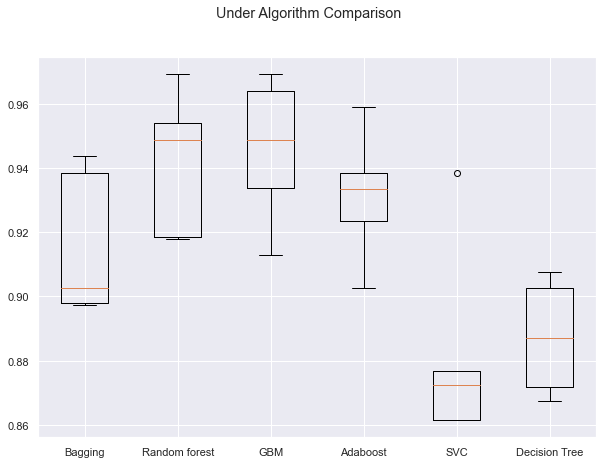

In [ ]:
####Compare all the models
## use boxplt to see the variation in model performance

# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Under Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results_under)
ax.set_xticklabels(names_under)

plt.show()

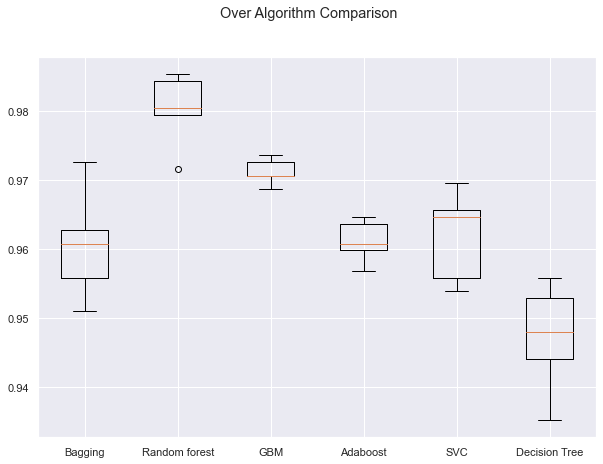

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Over Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results_over)
ax.set_xticklabels(names_under)

plt.show()

In [ ]:
# Plotting boxplots for CV scores of all models defined above


In [ ]:
rf_model = RandomForestClassifier(random_state=1)
gbc_model = GradientBoostingClassifier(random_state=1)
abc_model = AdaBoostClassifier(random_state=1)


# fit each model for feature importance 
rf_model.fit(X_train_over, y_train_over)
gbc_model.fit(X_train_over, y_train_over)
abc_model.fit(X_train_over, y_train_over)

AdaBoostClassifier(random_state=1)

In [ ]:
os_model_list

[('Bagging', BaggingClassifier(random_state=1)),
 ('Random forest', RandomForestClassifier(random_state=1)),
 ('GBM', GradientBoostingClassifier(random_state=1)),
 ('Adaboost', AdaBoostClassifier(random_state=1)),
 ('SVC', SVC(random_state=1)),
 ('Decision Tree', DecisionTreeClassifier(random_state=1))]

In [ ]:
### look at feature importances for each of the three models



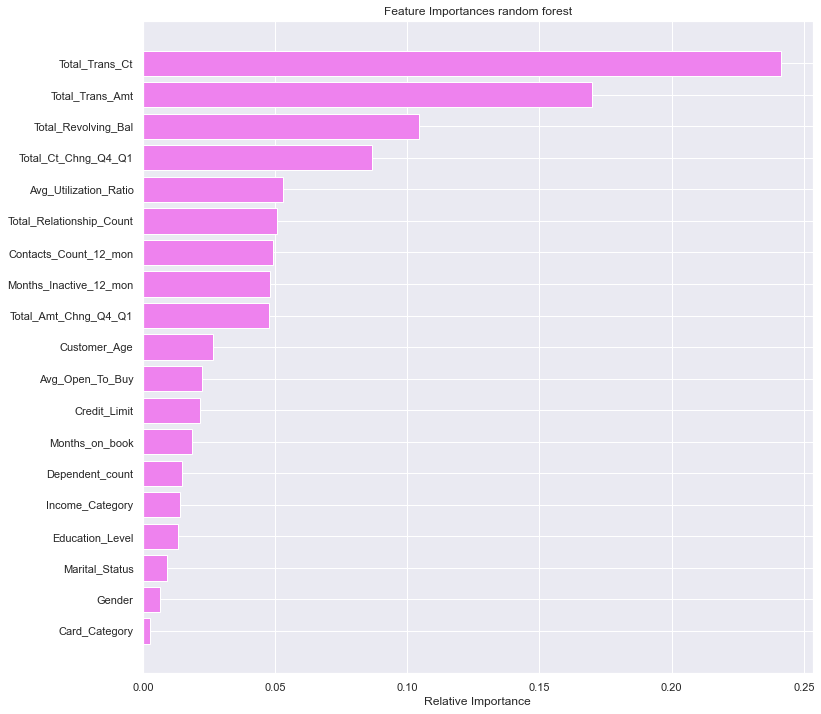

In [ ]:
feature_names = X.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances random forest")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

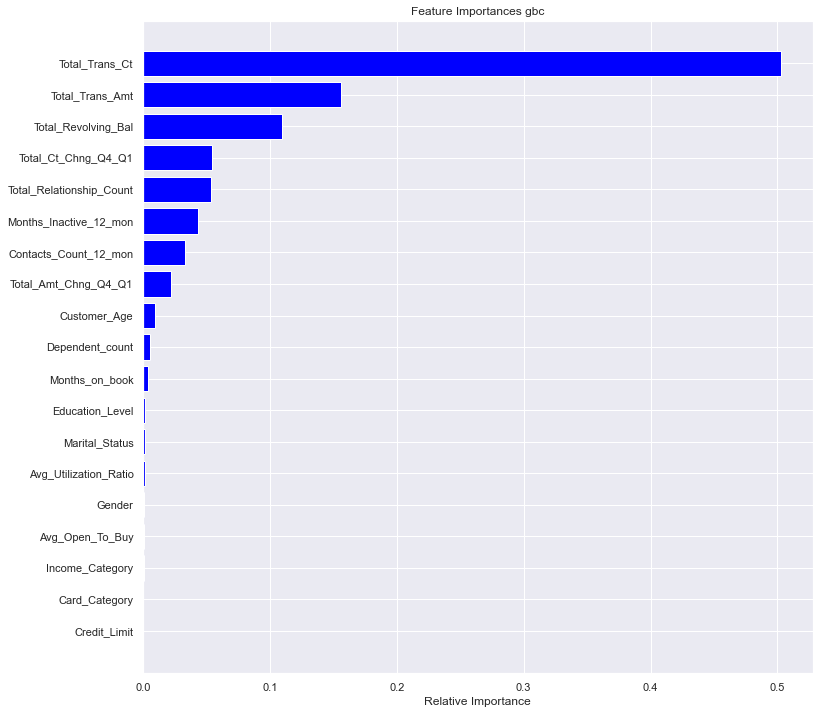

In [ ]:
feature_names = X.columns
importances = gbc_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances gbc")
plt.barh(range(len(indices)), importances[indices], color="blue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [ ]:
# both gbc and randomforest models have the highest feature impotance of total_trans count,total trans amt and total
# and total revolving balance as the top 3 features

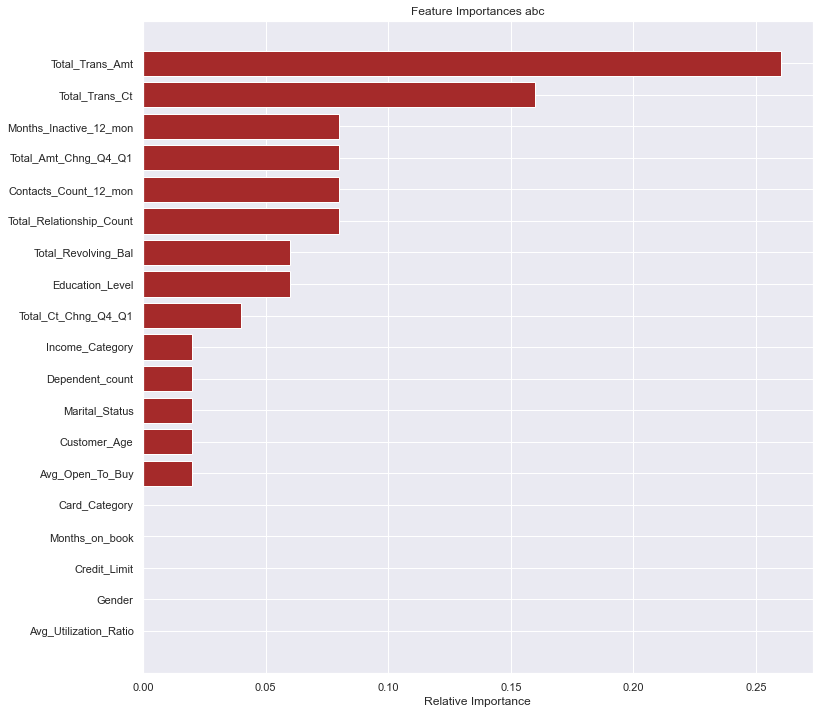

In [ ]:
feature_names = X.columns
importances = abc_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances abc")
plt.barh(range(len(indices)), importances[indices], color="brown", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### insights
- both gbc and randomforest models have the highest feature impotance of total_trans count,total trans amt and total
 and total revolving balance as the top 3 features


- While the abc classifier has the same top 2 but the third one is the total amt changed q4 to q1(ratio from trans amt from forth qtr to 1 st qtr)

### Hypertuning with gridsearch cv and Random search cv

- Use RandomForest, GBM and ADaboost from oversampled models 
- These had the best performances with the lowest variation in the CV scores amongst the models

In [ ]:
# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV

param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_jobs=-1,
    n_iter=50,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'n_estimators': 100, 'learning_rate': 0.2, 'base_estimator': DecisionTreeClassifier(max_depth=1, random_state=1)} with CV score=0.9497989185860802:


In [ ]:
# building model with best parameters
ada_boost_tuned = AdaBoostClassifier(
    n_estimators=100,
    learning_rate=.2,
    
    base_estimator=DecisionTreeClassifier(random_state=1),
)

# Fit the model on training data
ada_boost_tuned.fit(X_train_over, y_train_over)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=1),
                   learning_rate=0.2, n_estimators=100)

In [ ]:
### look at validation performance 
print("val_perf")
model_performance_classification_sklearn(ada_boost_tuned, X_val, y_val)

val_perf


Accuracy  Recall  Precision    F1
0     0.915   0.794      0.712 0.751

In [ ]:
### look at GRadientboost classifier 
import time


# A sample parameter
start = time.time()
param_grid = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }


# defining model
model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV



# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_jobs=-1,
    n_iter=50,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

end = time.time()
print("total time", end-start)

Best parameters are {'subsample': 0.85, 'n_estimators': 10, 'min_samples_split': 0.2090909090909091, 'min_samples_leaf': 0.13636363636363638, 'max_features': 'log2', 'max_depth': 8, 'loss': 'deviance', 'learning_rate': 0.15, 'criterion': 'friedman_mse'} with CV score=0.8589957474648348:
total time 71.44777297973633


In [ ]:
gbc_tune = randomized_cv.best_estimator_

In [ ]:
# Fit the model on training data
gbc_tune.fit(X_train_over, y_train_over)

GradientBoostingClassifier(learning_rate=0.15, max_depth=8, max_features='log2',
                           min_samples_leaf=0.13636363636363638,
                           min_samples_split=0.2090909090909091,
                           n_estimators=10, random_state=1, subsample=0.85)

In [ ]:
### random forest classifier tuning

In [ ]:
# A sample parameter
import time
start = time.time()
param_grid = {
    'max_depth': np.arange(2,20,1),
    "min_samples_leaf" : [1,2,5,10],
    'max_leaf_nodes' : np.arange(1,10,1),
    'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
    }


# defining model
model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV



# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_jobs=-1,
    n_iter=50,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

end = time.time()
print("total time", end-start)

Best parameters are {'min_samples_leaf': 5, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 9, 'max_depth': 8} with CV score=0.9015516942792818:
total time 51.10744857788086


In [ ]:
randf_tune = RandomForestClassifier(random_state=1, min_samples_leaf = 5, min_impurity_decrease = .0001, max_leaf_nodes = 9,
                                    max_depth = 8)
randf_tune.fit(X_train_over, y_train_over)

RandomForestClassifier(max_depth=8, max_leaf_nodes=9,
                       min_impurity_decrease=0.0001, min_samples_leaf=5,
                       random_state=1)

In [ ]:
### put together dataframes to compare all tuned models

randf_tune_df = model_performance_classification_sklearn(randf_tune, X_val, y_val)
gbc_tune_df = model_performance_classification_sklearn(gbc_tune, X_val, y_val)
abc_tune_df = model_performance_classification_sklearn(ada_boost_tuned, X_val, y_val)
ada_pipe_df = model_performance_classification_sklearn(ada_pipe, X_val, y_val)


In [ ]:
print("validation performace random forest")
randf_tune_df


validation performace random forest


Accuracy  Recall  Precision    F1
0     0.888   0.834      0.613 0.706

In [ ]:
print("validation perfromance gradient boost")
gbc_tune_df

validation perfromance gradient boost


Accuracy  Recall  Precision    F1
0     0.872   0.825      0.570 0.674

In [ ]:
print("validation perfromance ada boost")
abc_tune_df
abc_tune_df

validation perfromance ada boost


Accuracy  Recall  Precision    F1
0     0.915   0.794      0.712 0.751

In [ ]:
ada_pipe.fit(X_train_over,y_train_over)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('KNNimputer',
                                                                   KNNImputer(weights='distance')),
                                                                  ('pca',
                                                                   PCA(n_components=7,
                                                                       svd_solver='full'))]),
                                                  ['Customer_Age',
                                                   'Months_on_book',
                                                   'Credit_Limit',
                                                   'Total_Revolving_Bal',
                                                   'Avg_Open_To_Buy',
                                                   'Total_Amt_Chng_Q4_Q1',
 

In [ ]:
print("validation perfromance ada_pipe")
ada_pipe_df

validation perfromance ada_pipe


Accuracy  Recall  Precision    F1
0     0.839   0.807      0.500 0.617

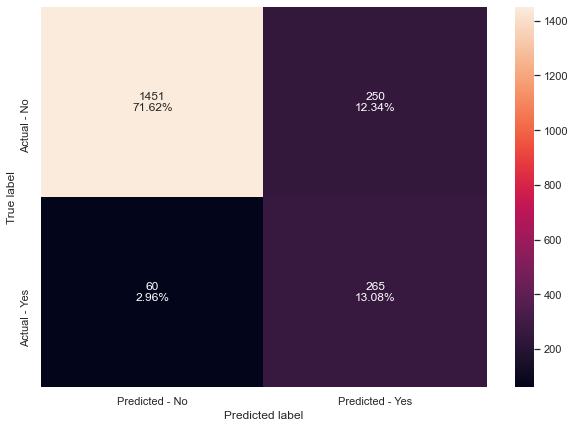

In [ ]:
make_confusion_matrix(ada_pipe,y_test)

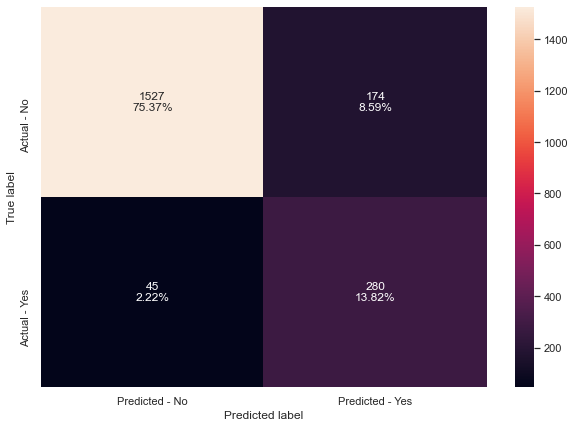

In [ ]:
make_confusion_matrix(randf_tune,y_test)

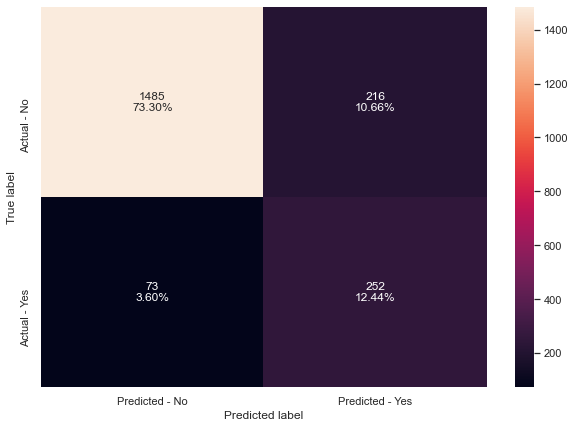

In [ ]:
make_confusion_matrix(gbc_tune,y_test)

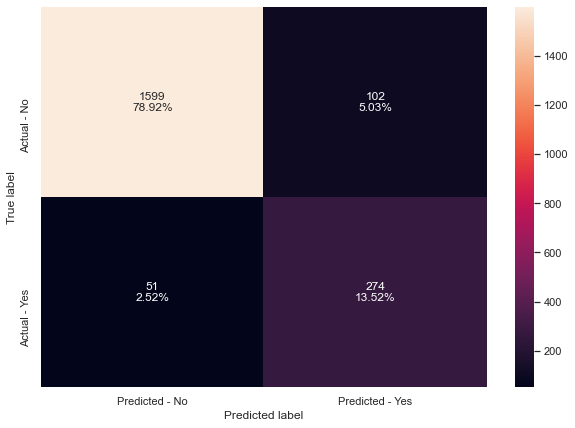

In [ ]:
make_confusion_matrix(ada_boost_tuned,y_test)

In [ ]:
randf_tune_df = model_performance_classification_sklearn(randf_tune, X_val, y_val)
gbc_tune_df = model_performance_classification_sklearn(gbc_tune, X_val, y_val)
abc_tune_df = model_performance_classification_sklearn(ada_boost_tuned, X_val, y_val)
ada_pipe_df = model_performance_classification_sklearn(ada_pipe, X_val, y_val)b

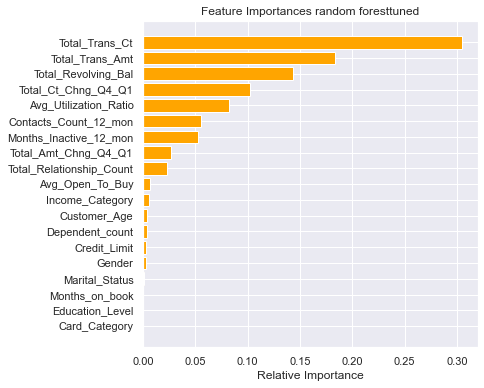

In [ ]:
feature_names = X.columns
importances = randf_tune.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6, 6))
plt.title("Feature Importances random foresttuned")
plt.barh(range(len(indices)), importances[indices], color="orange", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [ ]:
### Business Insights and conclusions

# the random forest tuned model offered the best perfrormance. It did the best minimizing false negatives

## the bank should be concerned about the top three features of making a customer churn 
## The bank should focus in more maarketing efforts on the feature importances that are the top 5
# to prevent more customers from churning
# THe marketing campaign should offer incentive, like a promotional deal with lower apr to increase 
# spending with the customers so they will stay a customer and not go elsewhere
# offer a points system that will increase the chances of consumers spending more money